In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import math
import psycopg2 as psy
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL
import pandas.io.sql as psql
%matplotlib inline


In [3]:
connection = psy.connect("dbname=nytd_clean_data user=cguy")

cohort_1 = psql.read_sql("SELECT * FROM cohort_1", connection)

In [4]:
cohort_1 = cohort_1.drop('index',axis=1)
cohort_1.head()

,Wave,StFCID,RepDate_outcomes,OutcmRpt,OutcmDte,OutcmFCS,CurrFTE,CurrPTE,EmplySklls,SocSecrty,...,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Race,RaceEthn,AgeMP
0,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
1,Wave 1: Age 17 Baseline Survey,AK450290395006,2011-03-01,Youth participated,2010-10-08,"Yes, is in FC on Date",No,No,No,"Yes, is receiving SSI or SSDI payments",...,0,0,0,0,0,0,1,1,1,17
2,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
3,Wave 2: Age 19 Followup,AK450290395006,2013-03-01,Youth participated,2012-12-28,"No, is not in FC on Date",No,No,No,No,...,0,0,0,0,0,0,1,1,1,17
4,Wave 1: Age 17 Baseline Survey,AK450448396586,2011-03-01,Youth participated,2010-12-28,"Yes, is in FC on Date",No,No,Yes,No,...,0,0,0,0,0,0,0,3,3,17


In [5]:
cohort_1.dtypes

Wave                        object
StFCID                      object
RepDate_outcomes    datetime64[ns]
OutcmRpt                    object
OutcmDte            datetime64[ns]
OutcmFCS                    object
CurrFTE                     object
CurrPTE                     object
EmplySklls                  object
SocSecrty                   object
EducAid                     object
PubFinAs                    object
PubFoodAs                   object
PubHousAs                   object
OthrFinAs                   object
HighEdCert                  object
CurrenRoll                  object
CnctAdult                   object
Homeless                    object
SubAbuse                    object
Incarc                      object
Children                    object
Marriage                    object
Medicaid                    object
OthrHlthIn                  object
MedicalIn                   object
MentlHlthIn                 object
PrescripIn                  object
SampleState         

# Distribution of Demographics

In [6]:
cohort_1.Wave.value_counts()

Wave 1: Age 17 Baseline Survey    22111
Wave 2: Age 19 Followup           11906
Name: Wave, dtype: int64

In [7]:
demographics = cohort_1[['St','DelinqntSv','Sex','Race','TribeSv','EdLevlSv','SpecEdSv','RaceEthn','AgeMP','Wave']]
demographics_W1 = demographics[demographics.Wave == "Wave 1: Age 17 Baseline Survey"]
demographics_W2 = demographics[demographics.Wave == "Wave 2: Age 19 Followup"]

demographics_W1.describe(include='all')


,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
count,22111,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111
unique,43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wave 1: Age 17 Baseline Survey
freq,5500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22111
mean,NaN,12.291348,1.506897,11.988422,12.172312,21.402243,12.512369,5.280494,16.560355,NaN
std,NaN,27.988233,0.499964,29.961278,28.056960,25.337851,28.125593,15.140712,0.528911,NaN
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,14.000000,NaN
25%,NaN,0.000000,1.000000,1.000000,0.000000,9.000000,0.000000,1.000000,16.000000,NaN
50%,NaN,0.000000,2.000000,2.000000,0.000000,10.000000,0.000000,2.000000,17.000000,NaN
75%,NaN,1.000000,2.000000,2.000000,0.000000,11.000000,1.000000,6.000000,17.000000,NaN


In [8]:
demographics_W2.describe(include='all')


,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
count,11906,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906
unique,42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wave 2: Age 19 Followup
freq,2301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11906
mean,NaN,3.690324,1.510331,9.035612,3.549639,13.943474,4.046783,3.963716,16.512347,NaN
std,NaN,16.046141,0.499914,25.736902,16.073475,16.151875,16.634467,11.456084,0.500204,NaN
min,NaN,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,16.000000,NaN
25%,NaN,0.000000,1.000000,1.000000,0.000000,9.000000,0.000000,1.000000,16.000000,NaN
50%,NaN,0.000000,2.000000,1.000000,0.000000,10.000000,0.000000,2.000000,17.000000,NaN
75%,NaN,0.000000,2.000000,2.000000,0.000000,11.000000,1.000000,3.000000,17.000000,NaN


In [9]:
def graph_demosW1(column, figsize_i=(6,6)):
    dist = demographics_W1[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 1:" + str(column), figsize=figsize_i)
    
def graph_demosW2(column, figsize_i=(6,6)):
    dist = demographics_W2[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 2:" + str(column), figsize=figsize_i)


,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
St,,,,,,,,,
AK,84,84,84,84,84,84,84,84,84
AL,148,148,148,148,148,148,148,148,148
AR,331,331,331,331,331,331,331,331,331
AZ,548,548,548,548,548,548,548,548,548
CA,5500,5500,5500,5500,5500,5500,5500,5500,5500
CO,414,414,414,414,414,414,414,414,414
DC,97,97,97,97,97,97,97,97,97
DE,190,190,190,190,190,190,190,190,190
FL,830,830,830,830,830,830,830,830,830


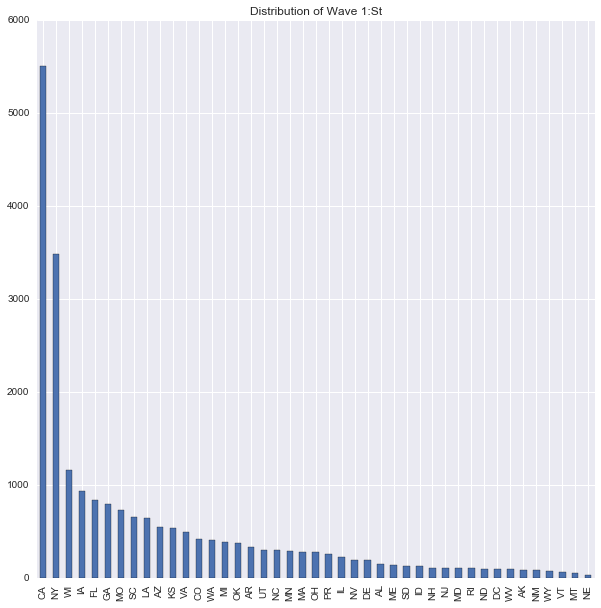

In [14]:
graph_demosW1('St',(10,10))
demographics_W1.groupby(['St']).count()

,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
St,,,,,,,,,
AK,69,69,69,69,69,69,69,69,69
AL,62,62,62,62,62,62,62,62,62
AR,203,203,203,203,203,203,203,203,203
AZ,97,97,97,97,97,97,97,97,97
CA,2301,2301,2301,2301,2301,2301,2301,2301,2301
CO,395,395,395,395,395,395,395,395,395
DC,70,70,70,70,70,70,70,70,70
DE,133,133,133,133,133,133,133,133,133
FL,442,442,442,442,442,442,442,442,442


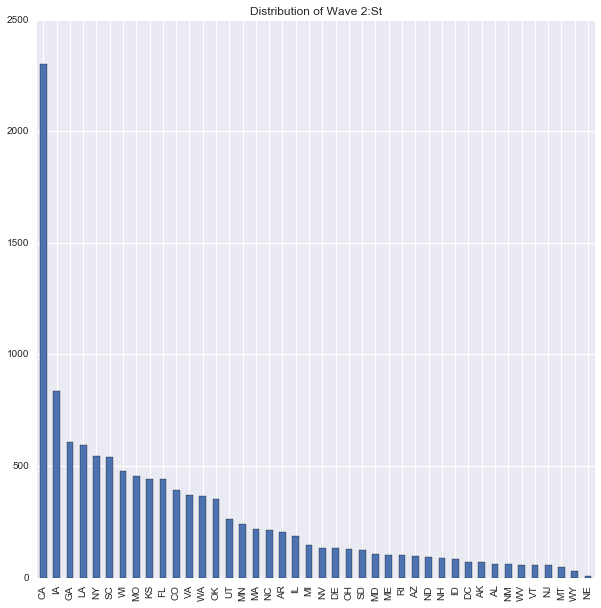

In [16]:
graph_demosW2('St',(10,10))
demographics_W2.groupby(['St']).count()

,St,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
DelinqntSv,,,,,,,,,
0,15121,15121,15121,15121,15121,15121,15121,15121,15121
1,3506,3506,3506,3506,3506,3506,3506,3506,3506
77,3484,3484,3484,3484,3484,3484,3484,3484,3484


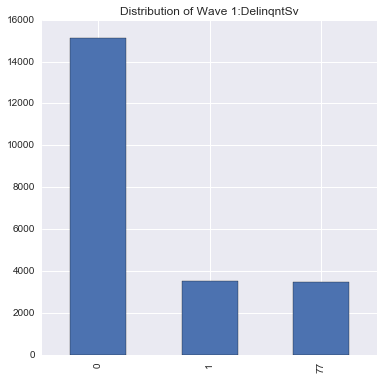

In [38]:
graph_demosW1('DelinqntSv')
demographics_W1.groupby(['DelinqntSv']).count()


,St,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
DelinqntSv,,,,,,,,,
0,9313,9313,9313,9313,9313,9313,9313,9313,9313
1,2049,2049,2049,2049,2049,2049,2049,2049,2049
77,544,544,544,544,544,544,544,544,544


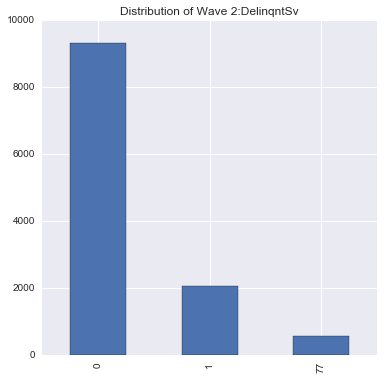

In [39]:
graph_demosW2('DelinqntSv')
demographics_W2.groupby(['DelinqntSv']).count()

,St,DelinqntSv,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
Sex,,,,,,,,,
1,10903,10903,10903,10903,10903,10903,10903,10903,10903
2,11208,11208,11208,11208,11208,11208,11208,11208,11208


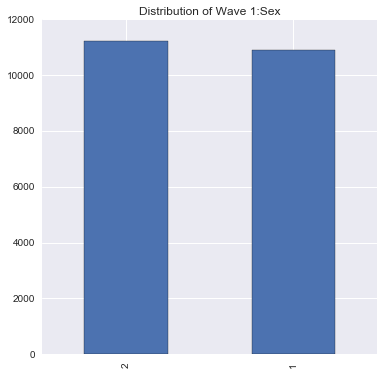

In [40]:
graph_demosW1('Sex')
demographics_W1.groupby(['Sex']).count()


,St,DelinqntSv,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
Sex,,,,,,,,,
1,5830,5830,5830,5830,5830,5830,5830,5830,5830
2,6076,6076,6076,6076,6076,6076,6076,6076,6076


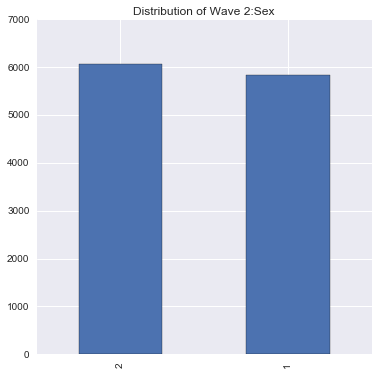

In [41]:
graph_demosW2('Sex')
demographics_W2.groupby(['Sex']).count()

,St,DelinqntSv,Sex,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
Race,,,,,,,,,
1,10919,10919,10919,10919,10919,10919,10919,10919,10919
2,7199,7199,7199,7199,7199,7199,7199,7199,7199
3,452,452,452,452,452,452,452,452,452
4,250,250,250,250,250,250,250,250,250
5,56,56,56,56,56,56,56,56,56
6,894,894,894,894,894,894,894,894,894
99,2341,2341,2341,2341,2341,2341,2341,2341,2341


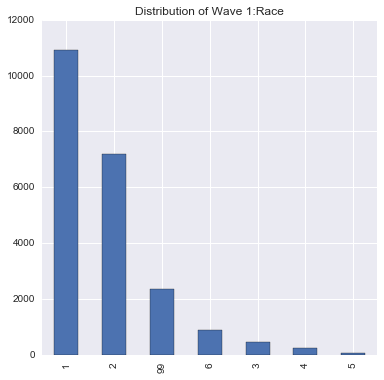

In [42]:
graph_demosW1('Race')
demographics_W1.groupby(['Race']).count()

,St,DelinqntSv,Sex,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
Race,,,,,,,,,
1,6322,6322,6322,6322,6322,6322,6322,6322,6322
2,3667,3667,3667,3667,3667,3667,3667,3667,3667
3,308,308,308,308,308,308,308,308,308
4,118,118,118,118,118,118,118,118,118
5,27,27,27,27,27,27,27,27,27
6,565,565,565,565,565,565,565,565,565
99,899,899,899,899,899,899,899,899,899


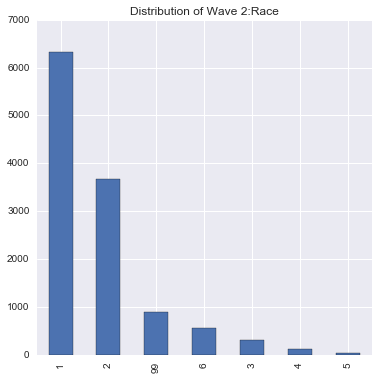

In [44]:
graph_demosW2('Race')
demographics_W2.groupby(['Race']).count()

,St,DelinqntSv,Sex,Race,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
TribeSv,,,,,,,,,
0,18057,18057,18057,18057,18057,18057,18057,18057,18057
1,566,566,566,566,566,566,566,566,566
77,3488,3488,3488,3488,3488,3488,3488,3488,3488


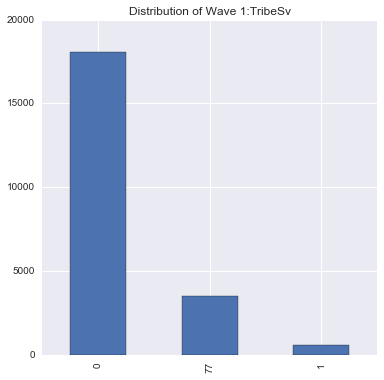

In [45]:
graph_demosW1('TribeSv')
demographics_W1.groupby(['TribeSv']).count()

,St,DelinqntSv,Sex,Race,EdLevlSv,SpecEdSv,RaceEthn,AgeMP,Wave
TribeSv,,,,,,,,,
0,10988,10988,10988,10988,10988,10988,10988,10988,10988
1,374,374,374,374,374,374,374,374,374
77,544,544,544,544,544,544,544,544,544


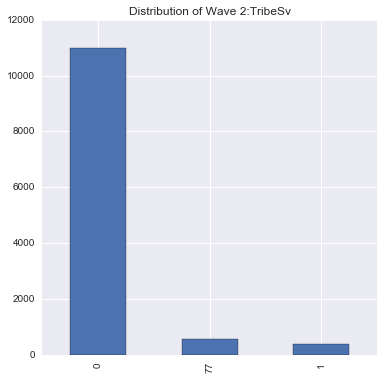

In [46]:
graph_demosW2('TribeSv')
demographics_W2.groupby(['TribeSv']).count()

,St,DelinqntSv,Sex,Race,TribeSv,SpecEdSv,RaceEthn,AgeMP,Wave
EdLevlSv,,,,,,,,,
0,178,178,178,178,178,178,178,178,178
6,117,117,117,117,117,117,117,117,117
7,284,284,284,284,284,284,284,284,284
8,1341,1341,1341,1341,1341,1341,1341,1341,1341
9,3857,3857,3857,3857,3857,3857,3857,3857,3857
10,6340,6340,6340,6340,6340,6340,6340,6340,6340
11,5072,5072,5072,5072,5072,5072,5072,5072,5072
12,919,919,919,919,919,919,919,919,919
13,127,127,127,127,127,127,127,127,127


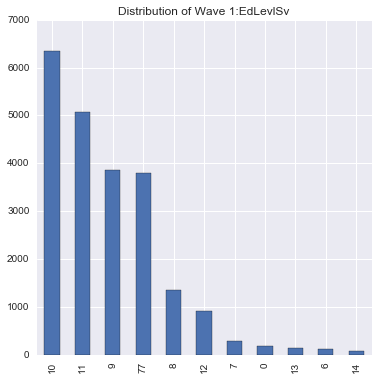

In [47]:
graph_demosW1('EdLevlSv')
demographics_W1.groupby(['EdLevlSv']).count()

,St,DelinqntSv,Sex,Race,TribeSv,SpecEdSv,RaceEthn,AgeMP,Wave
EdLevlSv,,,,,,,,,
0,84,84,84,84,84,84,84,84,84
6,67,67,67,67,67,67,67,67,67
7,163,163,163,163,163,163,163,163,163
8,879,879,879,879,879,879,879,879,879
9,2579,2579,2579,2579,2579,2579,2579,2579,2579
10,4018,4018,4018,4018,4018,4018,4018,4018,4018
11,2816,2816,2816,2816,2816,2816,2816,2816,2816
12,467,467,467,467,467,467,467,467,467
13,61,61,61,61,61,61,61,61,61


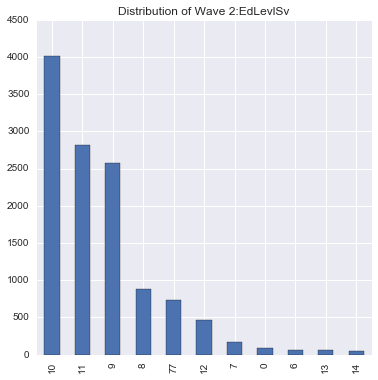

In [48]:
graph_demosW2('EdLevlSv')
demographics_W2.groupby(['EdLevlSv']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,RaceEthn,AgeMP,Wave
SpecEdSv,,,,,,,,,
0,13958,13958,13958,13958,13958,13958,13958,13958,13958
1,4620,4620,4620,4620,4620,4620,4620,4620,4620
77,3533,3533,3533,3533,3533,3533,3533,3533,3533


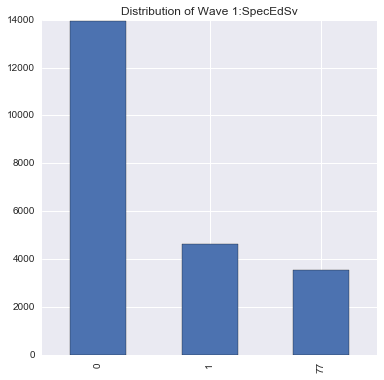

In [49]:
graph_demosW1('SpecEdSv')
demographics_W1.groupby(['SpecEdSv']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,RaceEthn,AgeMP,Wave
SpecEdSv,,,,,,,,,
0,8413,8413,8413,8413,8413,8413,8413,8413,8413
1,2905,2905,2905,2905,2905,2905,2905,2905,2905
77,588,588,588,588,588,588,588,588,588


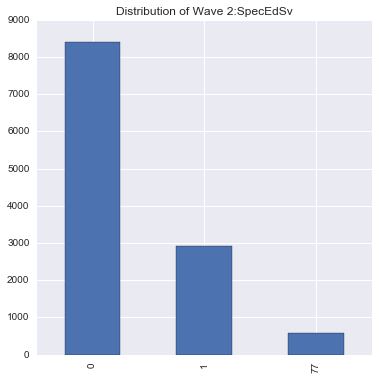

In [50]:
graph_demosW2('SpecEdSv')
demographics_W2.groupby(['SpecEdSv']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,AgeMP,Wave
RaceEthn,,,,,,,,,
1,8445,8445,8445,8445,8445,8445,8445,8445,8445
2,6968,6968,6968,6968,6968,6968,6968,6968,6968
3,371,371,371,371,371,371,371,371,371
4,231,231,231,231,231,231,231,231,231
5,43,43,43,43,43,43,43,43,43
6,755,755,755,755,755,755,755,755,755
7,4749,4749,4749,4749,4749,4749,4749,4749,4749
99,549,549,549,549,549,549,549,549,549


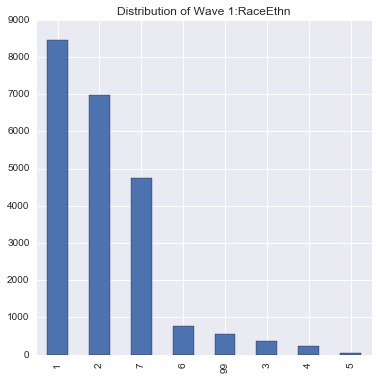

In [51]:
graph_demosW1('RaceEthn')
demographics_W1.groupby(['RaceEthn']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,AgeMP,Wave
RaceEthn,,,,,,,,,
1,5267,5267,5267,5267,5267,5267,5267,5267,5267
2,3552,3552,3552,3552,3552,3552,3552,3552,3552
3,262,262,262,262,262,262,262,262,262
4,105,105,105,105,105,105,105,105,105
5,19,19,19,19,19,19,19,19,19
6,475,475,475,475,475,475,475,475,475
7,2062,2062,2062,2062,2062,2062,2062,2062,2062
99,164,164,164,164,164,164,164,164,164


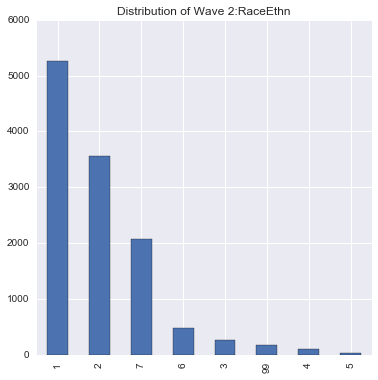

In [52]:
graph_demosW2('RaceEthn')
demographics_W2.groupby(['RaceEthn']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,Wave
AgeMP,,,,,,,,,
14,1,1,1,1,1,1,1,1,1
15,3,3,3,3,3,3,3,3,3
16,9954,9954,9954,9954,9954,9954,9954,9954,9954
17,12028,12028,12028,12028,12028,12028,12028,12028,12028
18,12,12,12,12,12,12,12,12,12
19,109,109,109,109,109,109,109,109,109
20,4,4,4,4,4,4,4,4,4


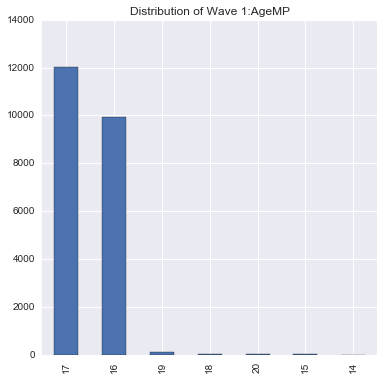

In [53]:
graph_demosW1('AgeMP')
demographics_W1.groupby(['AgeMP']).count()

,St,DelinqntSv,Sex,Race,TribeSv,EdLevlSv,SpecEdSv,RaceEthn,Wave
AgeMP,,,,,,,,,
16,5808,5808,5808,5808,5808,5808,5808,5808,5808
17,6096,6096,6096,6096,6096,6096,6096,6096,6096
18,2,2,2,2,2,2,2,2,2


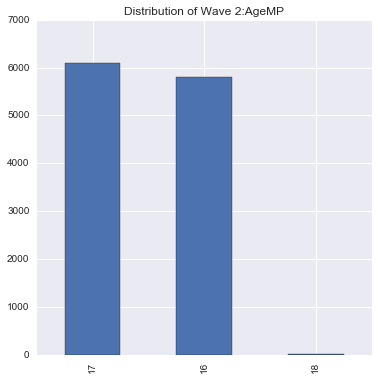

In [55]:
# We can assume that all Wave 2 participants are 19 yrs at time of survey. Ages shown below for the Wave 2 population 
# are their ages at time services were rendered (not when they took FU survey #1) ....

graph_demosW2('AgeMP')
demographics_W2.groupby(['AgeMP']).count()

In [17]:
###Need to relearn subplots stuff....

# # Working with multiple figure windows and subplots

# plt.figure(1)
# plt.subplot(211)
# plt.plot(t, s1)
# plt.subplot(212)
# plt.plot(t, 2*s1)

# plt.figure(2)
# plt.plot(t, s2)

# # now switch back to figure 1 and make some changes
# plt.figure(1)
# plt.subplot(211)
# plt.plot(t, s2, 'gs')
# ax = plt.gca()
# ax.set_xticklabels([])

# plt.show()

____________________________________________________________________________________________________________

# Distributions of Services

In [63]:
services = cohort_1[['ILNAsv','AcSuppSv','PSEdSuppSv','CareerSv','EmplyTrSv','BudgetSv','HousEdSv','HlthEdSv',\
                     'FamSuppSv','MentorSv','SILsv','RmBrdFASv','EducFinaSv','OthrFinaSv', 'Wave']]

services_W1 = services[services.Wave == "Wave 1: Age 17 Baseline Survey"]
services_W2 = services[services.Wave == "Wave 2: Age 19 Followup"]
    
services_W1.describe(include='all')

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
count,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111.000000,22111
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wave 1: Age 17 Baseline Survey
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22111
mean,12.578445,12.558138,12.278730,12.446113,12.320791,12.405092,12.431459,12.439103,12.380173,12.286192,12.194609,12.192936,12.219619,12.273167,NaN
std,27.865533,27.874326,27.993545,27.922523,27.975810,27.940038,27.928788,27.925521,27.950643,27.990404,28.028794,28.029492,28.018345,27.995886,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN


In [64]:
services_W2.describe(include='all')

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
count,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906.000000,11906
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wave 2: Age 19 Followup
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11906
mean,4.025869,4.003528,3.687720,3.892575,3.741475,3.849404,3.857299,3.875777,3.810180,3.710398,3.577524,3.592306,3.622291,3.681253,NaN
std,15.975759,15.980674,16.046659,16.004597,16.035885,16.013688,16.012035,16.008149,16.021843,16.042136,16.068158,16.065320,16.059519,16.047942,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [65]:
def graph_servW1(column, figsize_i=(6,6)):
    dist = services_W1[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 1:" + str(column), figsize=figsize_i)
    
def graph_servW2(column, figsize_i=(6,6)):
    dist = services_W2[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 2:" + str(column), figsize=figsize_i)


,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
ILNAsv,,,,,,,,,,,,,,
0,8773,8773,8773,8773,8773,8773,8773,8773,8773,8773,8773,8773,8773,8773
1,9854,9854,9854,9854,9854,9854,9854,9854,9854,9854,9854,9854,9854,9854
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


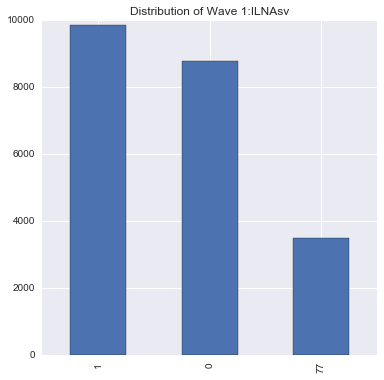

In [59]:
graph_servW1('ILNAsv')
services_W1.groupby(['ILNAsv']).count()

,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
ILNAsv,,,,,,,,,,,,,,
0,5318,5318,5318,5318,5318,5318,5318,5318,5318,5318,5318,5318,5318,5318
1,6044,6044,6044,6044,6044,6044,6044,6044,6044,6044,6044,6044,6044,6044
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


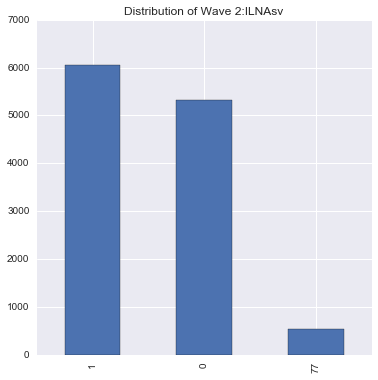

In [60]:
graph_servW2('ILNAsv')
services_W2.groupby(['ILNAsv']).count()

,ILNAsv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
AcSuppSv,,,,,,,,,,,,,,
0,9222,9222,9222,9222,9222,9222,9222,9222,9222,9222,9222,9222,9222,9222
1,9405,9405,9405,9405,9405,9405,9405,9405,9405,9405,9405,9405,9405,9405
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


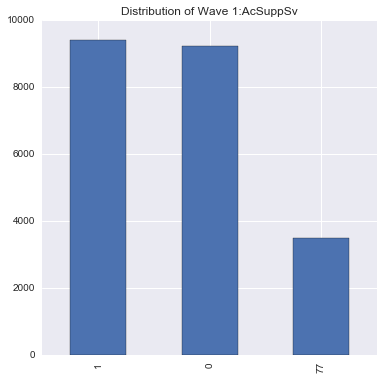

In [66]:
graph_servW1('AcSuppSv')
services_W1.groupby(['AcSuppSv']).count()

,ILNAsv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
AcSuppSv,,,,,,,,,,,,,,
0,5584,5584,5584,5584,5584,5584,5584,5584,5584,5584,5584,5584,5584,5584
1,5778,5778,5778,5778,5778,5778,5778,5778,5778,5778,5778,5778,5778,5778
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


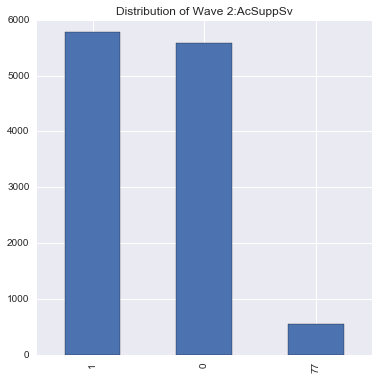

In [67]:
graph_servW2('AcSuppSv')
services_W2.groupby(['AcSuppSv']).count()


,ILNAsv,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
PSEdSuppSv,,,,,,,,,,,,,,
0,15400,15400,15400,15400,15400,15400,15400,15400,15400,15400,15400,15400,15400,15400
1,3227,3227,3227,3227,3227,3227,3227,3227,3227,3227,3227,3227,3227,3227
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


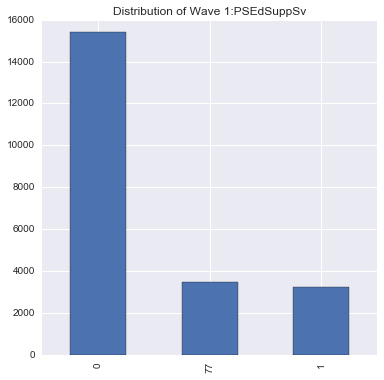

In [68]:
graph_servW1('PSEdSuppSv')
services_W1.groupby(['PSEdSuppSv']).count()

,ILNAsv,AcSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
PSEdSuppSv,,,,,,,,,,,,,,
0,9344,9344,9344,9344,9344,9344,9344,9344,9344,9344,9344,9344,9344,9344
1,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


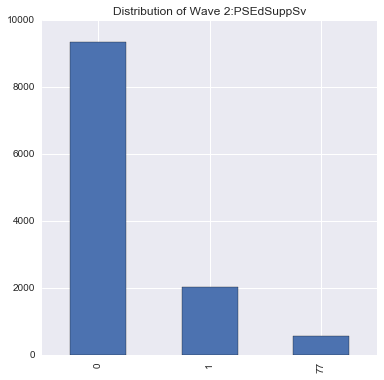

In [69]:
graph_servW2('PSEdSuppSv')
services_W2.groupby(['PSEdSuppSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
CareerSv,,,,,,,,,,,,,,
0,11699,11699,11699,11699,11699,11699,11699,11699,11699,11699,11699,11699,11699,11699
1,6928,6928,6928,6928,6928,6928,6928,6928,6928,6928,6928,6928,6928,6928
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


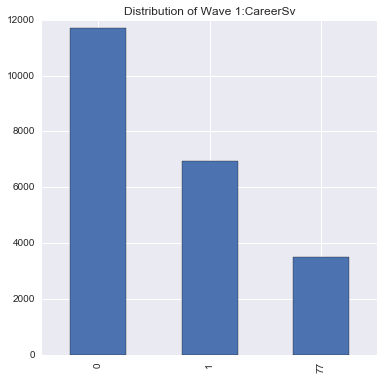

In [70]:
graph_servW1('CareerSv')
services_W1.groupby(['CareerSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
CareerSv,,,,,,,,,,,,,,
0,6905,6905,6905,6905,6905,6905,6905,6905,6905,6905,6905,6905,6905,6905
1,4457,4457,4457,4457,4457,4457,4457,4457,4457,4457,4457,4457,4457,4457
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


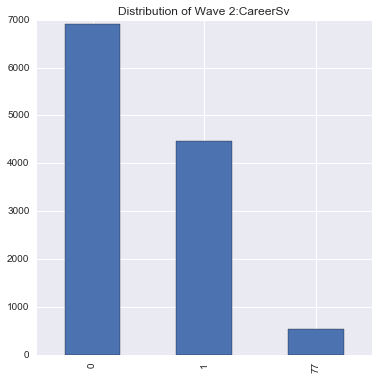

In [71]:
graph_servW2('CareerSv')
services_W2.groupby(['CareerSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
EmplyTrSv,,,,,,,,,,,,,,
0,14470,14470,14470,14470,14470,14470,14470,14470,14470,14470,14470,14470,14470,14470
1,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157,4157
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


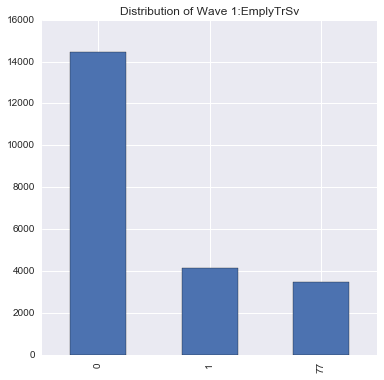

In [73]:
graph_servW1('EmplyTrSv')
services_W1.groupby(['EmplyTrSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
EmplyTrSv,,,,,,,,,,,,,,
0,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704,8704
1,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658,2658
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


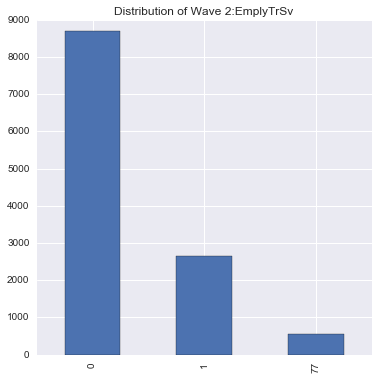

In [72]:
graph_servW2('EmplyTrSv')
services_W2.groupby(['EmplyTrSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
BudgetSv,,,,,,,,,,,,,,
0,12606,12606,12606,12606,12606,12606,12606,12606,12606,12606,12606,12606,12606,12606
1,6021,6021,6021,6021,6021,6021,6021,6021,6021,6021,6021,6021,6021,6021
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


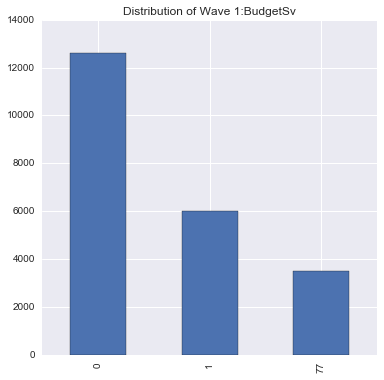

In [74]:
graph_servW1('BudgetSv')
services_W1.groupby(['BudgetSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
BudgetSv,,,,,,,,,,,,,,
0,7419,7419,7419,7419,7419,7419,7419,7419,7419,7419,7419,7419,7419,7419
1,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943,3943
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


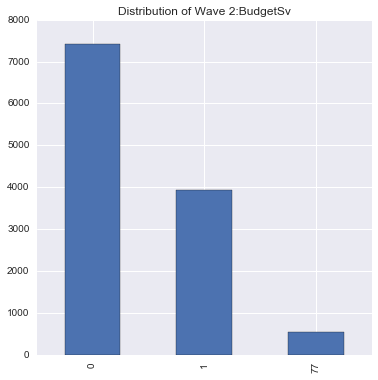

In [75]:
graph_servW2('BudgetSv')
services_W2.groupby(['BudgetSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
HousEdSv,,,,,,,,,,,,,,
0,12023,12023,12023,12023,12023,12023,12023,12023,12023,12023,12023,12023,12023,12023
1,6604,6604,6604,6604,6604,6604,6604,6604,6604,6604,6604,6604,6604,6604
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


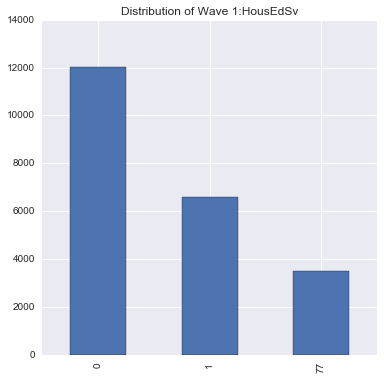

In [76]:
graph_servW1('HousEdSv')
services_W1.groupby(['HousEdSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
HousEdSv,,,,,,,,,,,,,,
0,7325,7325,7325,7325,7325,7325,7325,7325,7325,7325,7325,7325,7325,7325
1,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037,4037
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


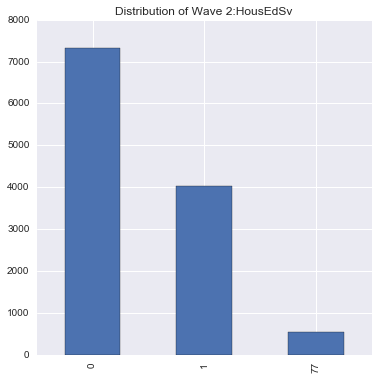

In [77]:
graph_servW2('HousEdSv')
services_W2.groupby(['HousEdSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
HlthEdSv,,,,,,,,,,,,,,
0,11854,11854,11854,11854,11854,11854,11854,11854,11854,11854,11854,11854,11854,11854
1,6773,6773,6773,6773,6773,6773,6773,6773,6773,6773,6773,6773,6773,6773
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


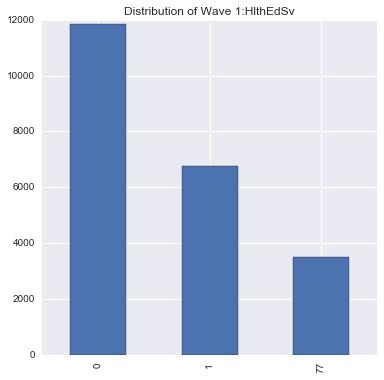

In [78]:
graph_servW1('HlthEdSv')
services_W1.groupby(['HlthEdSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
HlthEdSv,,,,,,,,,,,,,,
0,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105,7105
1,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257,4257
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


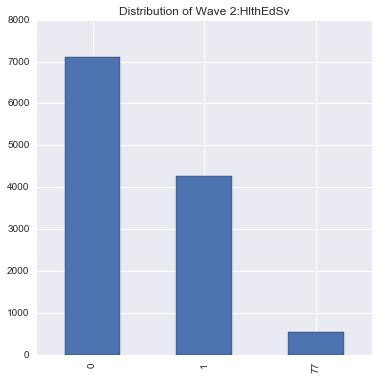

In [80]:
graph_servW2('HlthEdSv')
services_W2.groupby(['HlthEdSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
FamSuppSv,,,,,,,,,,,,,,
0,13157,13157,13157,13157,13157,13157,13157,13157,13157,13157,13157,13157,13157,13157
1,5470,5470,5470,5470,5470,5470,5470,5470,5470,5470,5470,5470,5470,5470
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


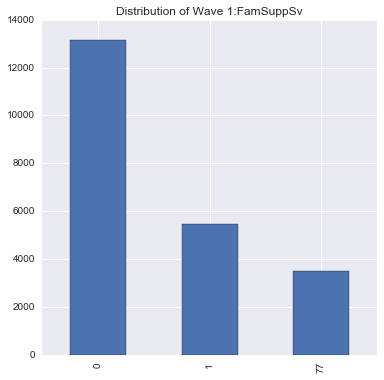

In [81]:
graph_servW1('FamSuppSv')
services_W1.groupby(['FamSuppSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
FamSuppSv,,,,,,,,,,,,,,
0,7886,7886,7886,7886,7886,7886,7886,7886,7886,7886,7886,7886,7886,7886
1,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476,3476
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


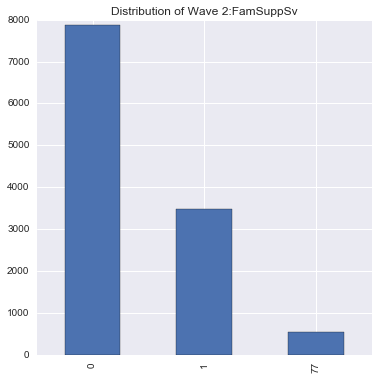

In [82]:
graph_servW2('FamSuppSv')
services_W2.groupby(['FamSuppSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
MentorSv,,,,,,,,,,,,,,
0,15235,15235,15235,15235,15235,15235,15235,15235,15235,15235,15235,15235,15235,15235
1,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392,3392
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


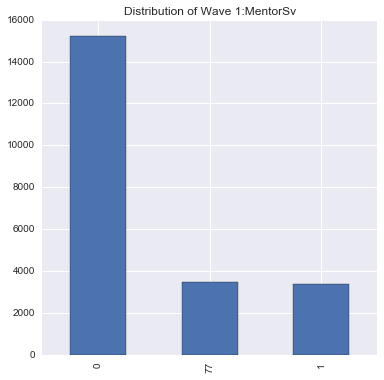

In [84]:
graph_servW1('MentorSv')
services_W1.groupby(['MentorSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,SILsv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
MentorSv,,,,,,,,,,,,,,
0,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074,9074
1,2288,2288,2288,2288,2288,2288,2288,2288,2288,2288,2288,2288,2288,2288
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


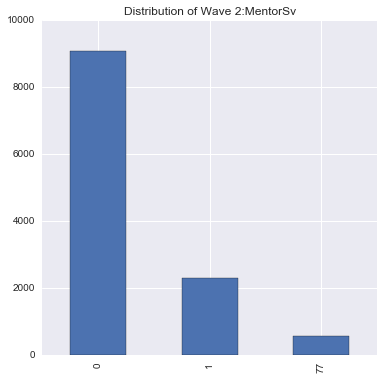

In [83]:
graph_servW2('MentorSv')
services_W2.groupby(['MentorSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
SILsv,,,,,,,,,,,,,,
0,17260,17260,17260,17260,17260,17260,17260,17260,17260,17260,17260,17260,17260,17260
1,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367,1367
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


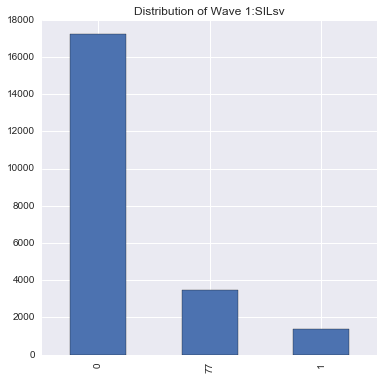

In [85]:
graph_servW1('SILsv')
services_W1.groupby(['SILsv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,RmBrdFASv,EducFinaSv,OthrFinaSv,Wave
SILsv,,,,,,,,,,,,,,
0,10656,10656,10656,10656,10656,10656,10656,10656,10656,10656,10656,10656,10656,10656
1,706,706,706,706,706,706,706,706,706,706,706,706,706,706
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


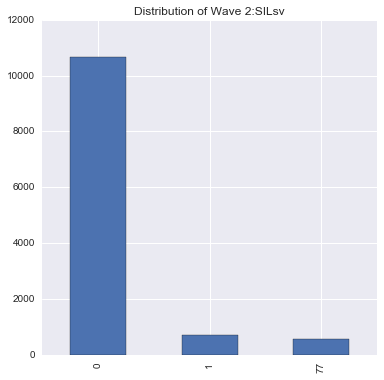

In [86]:
graph_servW2('SILsv')
services_W2.groupby(['SILsv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,EducFinaSv,OthrFinaSv,Wave
RmBrdFASv,,,,,,,,,,,,,,
0,17297,17297,17297,17297,17297,17297,17297,17297,17297,17297,17297,17297,17297,17297
1,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330,1330
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


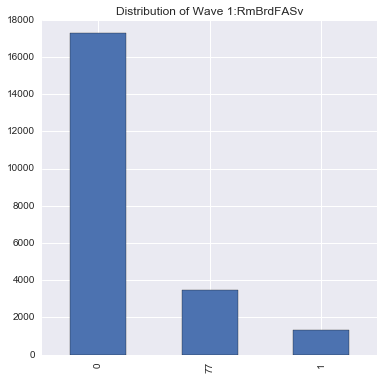

In [89]:
graph_servW1('RmBrdFASv')
services_W1.groupby(['RmBrdFASv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,EducFinaSv,OthrFinaSv,Wave
RmBrdFASv,,,,,,,,,,,,,,
0,10480,10480,10480,10480,10480,10480,10480,10480,10480,10480,10480,10480,10480,10480
1,882,882,882,882,882,882,882,882,882,882,882,882,882,882
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


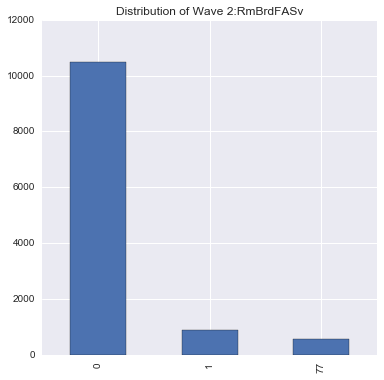

In [88]:
graph_servW2('RmBrdFASv')
services_W2.groupby(['RmBrdFASv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,OthrFinaSv,Wave
EducFinaSv,,,,,,,,,,,,,,
0,16707,16707,16707,16707,16707,16707,16707,16707,16707,16707,16707,16707,16707,16707
1,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920,1920
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


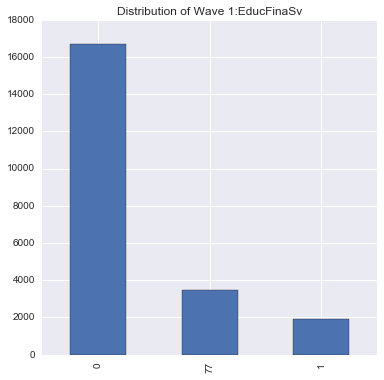

In [90]:
graph_servW1('EducFinaSv')
services_W1.groupby(['EducFinaSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,OthrFinaSv,Wave
EducFinaSv,,,,,,,,,,,,,,
0,10123,10123,10123,10123,10123,10123,10123,10123,10123,10123,10123,10123,10123,10123
1,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239,1239
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


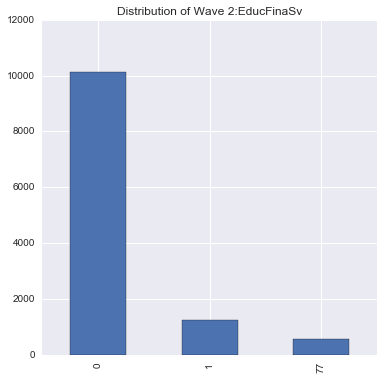

In [91]:
graph_servW2('EducFinaSv')
services_W2.groupby(['EducFinaSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,Wave
OthrFinaSv,,,,,,,,,,,,,,
0,15523,15523,15523,15523,15523,15523,15523,15523,15523,15523,15523,15523,15523,15523
1,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104,3104
77,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484,3484


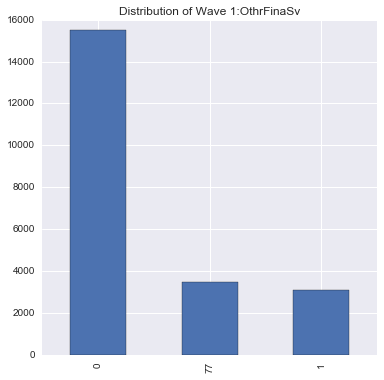

In [92]:
graph_servW1('OthrFinaSv')
services_W1.groupby(['OthrFinaSv']).count()

,ILNAsv,AcSuppSv,PSEdSuppSv,CareerSv,EmplyTrSv,BudgetSv,HousEdSv,HlthEdSv,FamSuppSv,MentorSv,SILsv,RmBrdFASv,EducFinaSv,Wave
OthrFinaSv,,,,,,,,,,,,,,
0,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421,9421
1,1941,1941,1941,1941,1941,1941,1941,1941,1941,1941,1941,1941,1941,1941
77,544,544,544,544,544,544,544,544,544,544,544,544,544,544


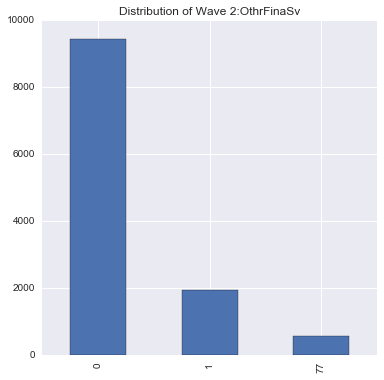

In [93]:
graph_servW2('OthrFinaSv')
services_W2.groupby(['OthrFinaSv']).count()

____________________________________________________________________________________________________________

# Distributions of Outcomes


In [94]:
outcomes = cohort_1[['PubFoodAs','PubHousAs','OthrFinAs','HighEdCert','CurrFTE','CurrPTE','EmplySklls','SocSecrty',\
                     'EducAid','PubFinAs','CurrenRoll','CnctAdult','PrescripIn','Homeless','SubAbuse','Incarc',\
                     'Children','Marriage','Medicaid','OthrHlthIn','MedicalIn','MentlHlthIn', 'Wave']]

outcomes_W1 = outcomes[outcomes.Wave == "Wave 1: Age 17 Baseline Survey"]
outcomes_W2 = outcomes[outcomes.Wave == "Wave 2: Age 19 Followup"]

outcomes_W1.describe(include='all')

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
count,22111,22111,22111,22111,22111,22111,22111,22111,22111,22111,...,22111,22111,22111,22111,22111,22111,22111,22111,22111,22111
unique,5,5,4,9,4,4,4,4,4,5,...,4,4,4,4,5,5,6,6,6,1
top,Blank,Blank,No,None of the above,No,No,No,No,No,Blank,...,No,No,No,No,Not Applicable,Yes,No,Not Applicable,Not Applicable,Wave 1: Age 17 Baseline Survey
freq,9436,9385,11985,12293,13270,11681,10290,11352,12727,9325,...,10983,9873,8864,12353,12576,11287,9109,11210,11395,22111


In [95]:
outcomes_W2.describe(include='all')

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
count,11906,11906,11906,11705,11906,11906,11906,11906,11906,11906,...,11906,11906,11906,11906,11906,11906,11906,11906,11906,11906
unique,5,5,4,9,4,4,4,4,4,5,...,4,4,4,4,5,5,6,6,6,1
top,Blank,Blank,No,Blank,No,No,No,No,No,Blank,...,No,No,No,No,Not Applicable,Yes,No,Not Applicable,Not Applicable,Wave 2: Age 19 Followup
freq,4571,4567,5999,4584,6370,5371,4775,6126,5409,4575,...,5755,6221,5744,6273,6431,5492,5648,6296,6401,11906


In [96]:
def graph_outcmW1(column, figsize_i=(6,6)):
    dist = outcomes_W1[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 1:" + str(column), figsize=figsize_i)
    
def graph_outcmW2(column, figsize_i=(6,6)):
    dist = outcomes_W2[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 2:" + str(column), figsize=figsize_i)

,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
PubFoodAs,,,,,,,,,,,,,,,,,,,,,
Blank,9436,9436,9436,9436,9436,9436,9436,9436,9436,9436,...,9436,9436,9436,9436,9436,9436,9436,9436,9436,9436
Declined,150,150,150,150,150,150,150,150,150,150,...,150,150,150,150,150,150,150,150,150,150
No,4632,4632,4632,4632,4632,4632,4632,4632,4632,4632,...,4632,4632,4632,4632,4632,4632,4632,4632,4632,4632
Not Applicable (in Foster Care),7249,7249,7249,7249,7249,7249,7249,7249,7249,7249,...,7249,7249,7249,7249,7249,7249,7249,7249,7249,7249
Yes,644,644,644,644,644,644,644,644,644,644,...,644,644,644,644,644,644,644,644,644,644


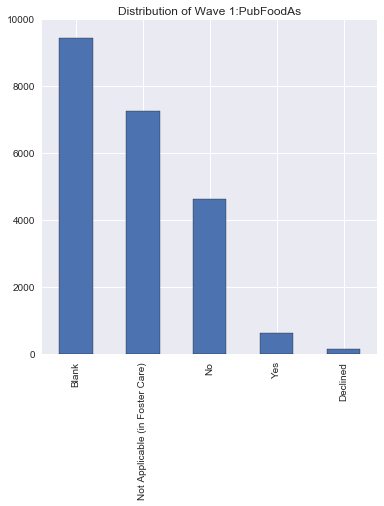

In [100]:
graph_outcmW1('PubFoodAs')
outcomes_W1.groupby(['PubFoodAs']).count()

,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
PubFoodAs,,,,,,,,,,,,,,,,,,,,,
Blank,4571,4571,4571,4571,4571,4571,4571,4571,4571,4571,...,4571,4571,4571,4571,4571,4571,4571,4571,4571,4571
Declined,102,102,100,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
No,3083,3083,2931,3083,3083,3083,3083,3083,3083,3083,...,3083,3083,3083,3083,3083,3083,3083,3083,3083,3083
Not Applicable (in Foster Care),2628,2628,2624,2628,2628,2628,2628,2628,2628,2628,...,2628,2628,2628,2628,2628,2628,2628,2628,2628,2628
Yes,1522,1522,1479,1522,1522,1522,1522,1522,1522,1522,...,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522


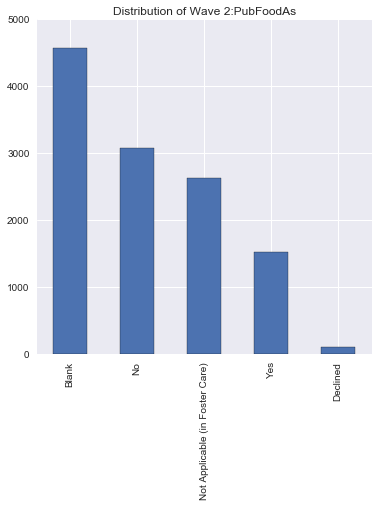

In [101]:
graph_outcmW2('PubFoodAs')
outcomes_W2.groupby(['PubFoodAs']).count()

,PubFoodAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
PubHousAs,,,,,,,,,,,,,,,,,,,,,
Blank,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385,...,9385,9385,9385,9385,9385,9385,9385,9385,9385,9385
Declined,187,187,187,187,187,187,187,187,187,187,...,187,187,187,187,187,187,187,187,187,187
No,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974,...,4974,4974,4974,4974,4974,4974,4974,4974,4974,4974
Not Applicable (in Foster Care),7356,7356,7356,7356,7356,7356,7356,7356,7356,7356,...,7356,7356,7356,7356,7356,7356,7356,7356,7356,7356
Yes,209,209,209,209,209,209,209,209,209,209,...,209,209,209,209,209,209,209,209,209,209


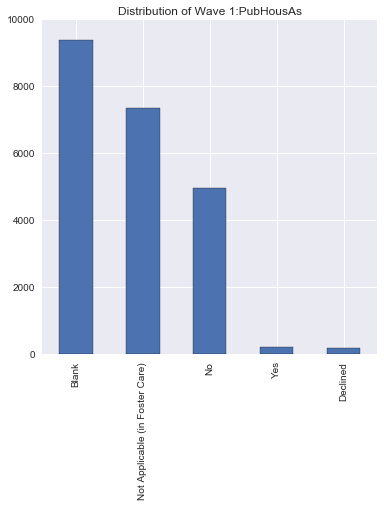

In [103]:
graph_outcmW1('PubHousAs')
outcomes_W1.groupby(['PubHousAs']).count()

,PubFoodAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
PubHousAs,,,,,,,,,,,,,,,,,,,,,
Blank,4567,4567,4567,4567,4567,4567,4567,4567,4567,4567,...,4567,4567,4567,4567,4567,4567,4567,4567,4567,4567
Declined,109,109,107,109,109,109,109,109,109,109,...,109,109,109,109,109,109,109,109,109,109
No,4279,4279,4103,4279,4279,4279,4279,4279,4279,4279,...,4279,4279,4279,4279,4279,4279,4279,4279,4279,4279
Not Applicable (in Foster Care),2626,2626,2622,2626,2626,2626,2626,2626,2626,2626,...,2626,2626,2626,2626,2626,2626,2626,2626,2626,2626
Yes,325,325,306,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325


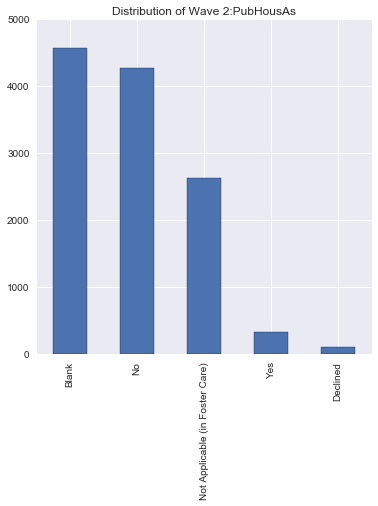

In [102]:
graph_outcmW2('PubHousAs')
outcomes_W2.groupby(['PubHousAs']).count()

,PubFoodAs,PubHousAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
OthrFinAs,,,,,,,,,,,,,,,,,,,,,
Blank,8468,8468,8468,8468,8468,8468,8468,8468,8468,8468,...,8468,8468,8468,8468,8468,8468,8468,8468,8468,8468
Declined,364,364,364,364,364,364,364,364,364,364,...,364,364,364,364,364,364,364,364,364,364
No,11985,11985,11985,11985,11985,11985,11985,11985,11985,11985,...,11985,11985,11985,11985,11985,11985,11985,11985,11985,11985
Yes,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294,...,1294,1294,1294,1294,1294,1294,1294,1294,1294,1294


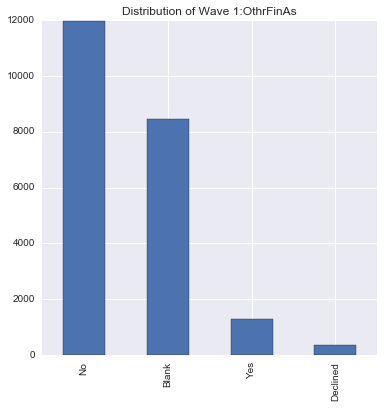

In [104]:
graph_outcmW1('OthrFinAs')
outcomes_W1.groupby(['OthrFinAs']).count()

,PubFoodAs,PubHousAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
OthrFinAs,,,,,,,,,,,,,,,,,,,,,
Blank,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576,...,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576
Declined,192,192,190,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,192,192,192
No,5999,5999,5822,5999,5999,5999,5999,5999,5999,5999,...,5999,5999,5999,5999,5999,5999,5999,5999,5999,5999
Yes,1139,1139,1117,1139,1139,1139,1139,1139,1139,1139,...,1139,1139,1139,1139,1139,1139,1139,1139,1139,1139


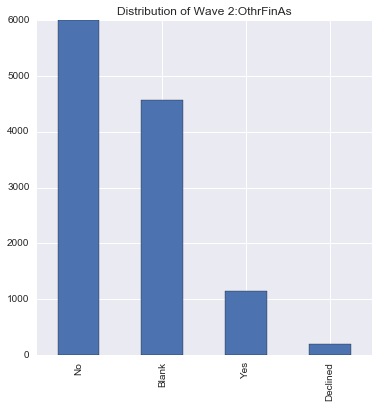

In [105]:
graph_outcmW2('OthrFinAs')
outcomes_W2.groupby(['OthrFinAs']).count()

,PubFoodAs,PubHousAs,OthrFinAs,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
HighEdCert,,,,,,,,,,,,,,,,,,,,,
Associate's Degree,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Bachelor's Degree,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Blank,8558,8558,8558,8558,8558,8558,8558,8558,8558,8558,...,8558,8558,8558,8558,8558,8558,8558,8558,8558,8558
Declined,583,583,583,583,583,583,583,583,583,583,...,583,583,583,583,583,583,583,583,583,583
High school diploma/GED,634,634,634,634,634,634,634,634,634,634,...,634,634,634,634,634,634,634,634,634,634
Higher degree,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
None of the above,12293,12293,12293,12293,12293,12293,12293,12293,12293,12293,...,12293,12293,12293,12293,12293,12293,12293,12293,12293,12293
Vocational certificate,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Vocational license,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


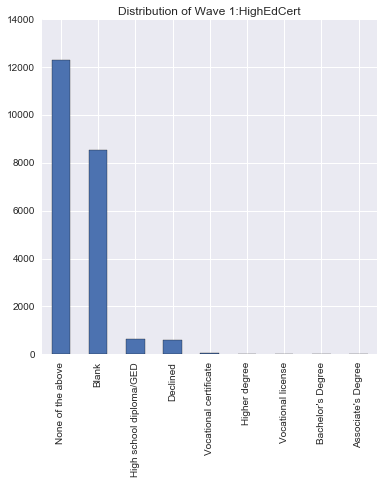

In [106]:
graph_outcmW1('HighEdCert')
outcomes_W1.groupby(['HighEdCert']).count()

,PubFoodAs,PubHousAs,OthrFinAs,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
HighEdCert,,,,,,,,,,,,,,,,,,,,,
Associate's Degree,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Bachelor's Degree,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Blank,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584,...,4584,4584,4584,4584,4584,4584,4584,4584,4584,4584
Declined,151,151,151,151,151,151,151,151,151,151,...,151,151,151,151,151,151,151,151,151,151
High school diploma/GED,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065,...,4065,4065,4065,4065,4065,4065,4065,4065,4065,4065
Higher degree,12,12,12,12,12,12,12,12,12,12,...,12,12,12,12,12,12,12,12,12,12
None of the above,2748,2748,2748,2748,2748,2748,2748,2748,2748,2748,...,2748,2748,2748,2748,2748,2748,2748,2748,2748,2748
Vocational certificate,102,102,102,102,102,102,102,102,102,102,...,102,102,102,102,102,102,102,102,102,102
Vocational license,32,32,32,32,32,32,32,32,32,32,...,32,32,32,32,32,32,32,32,32,32


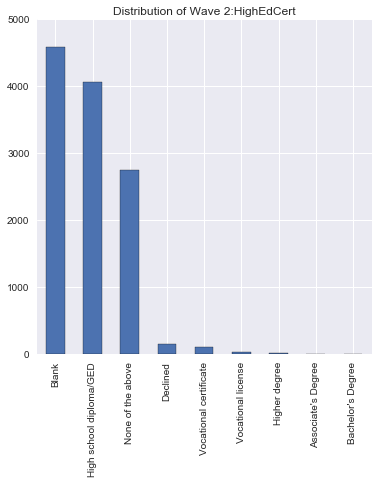

In [107]:
graph_outcmW2('HighEdCert')
outcomes_W2.groupby(['HighEdCert']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
CurrFTE,,,,,,,,,,,,,,,,,,,,,
Blank,8466,8466,8466,8466,8466,8466,8466,8466,8466,8466,...,8466,8466,8466,8466,8466,8466,8466,8466,8466,8466
Declined,138,138,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138,138,138,138,138
No,13270,13270,13270,13270,13270,13270,13270,13270,13270,13270,...,13270,13270,13270,13270,13270,13270,13270,13270,13270,13270
"Yes, employed full time",237,237,237,237,237,237,237,237,237,237,...,237,237,237,237,237,237,237,237,237,237


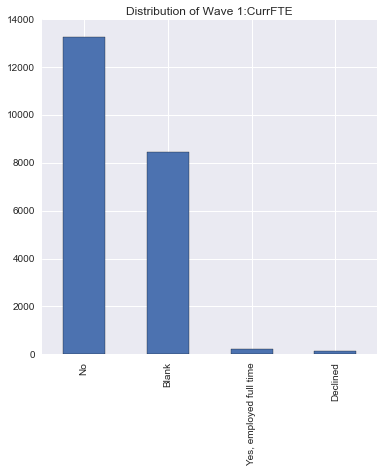

In [108]:
graph_outcmW1('CurrFTE')
outcomes_W1.groupby(['CurrFTE']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
CurrFTE,,,,,,,,,,,,,,,,,,,,,
Blank,4579,4579,4579,4579,4579,4579,4579,4579,4579,4579,...,4579,4579,4579,4579,4579,4579,4579,4579,4579,4579
Declined,94,94,94,92,94,94,94,94,94,94,...,94,94,94,94,94,94,94,94,94,94
No,6370,6370,6370,6224,6370,6370,6370,6370,6370,6370,...,6370,6370,6370,6370,6370,6370,6370,6370,6370,6370
"Yes, employed full time",863,863,863,810,863,863,863,863,863,863,...,863,863,863,863,863,863,863,863,863,863


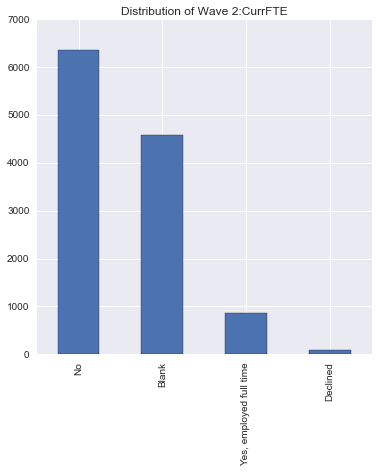

In [109]:
graph_outcmW2('CurrFTE')
outcomes_W2.groupby(['CurrFTE']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
CurrPTE,,,,,,,,,,,,,,,,,,,,,
Blank,8479,8479,8479,8479,8479,8479,8479,8479,8479,8479,...,8479,8479,8479,8479,8479,8479,8479,8479,8479,8479
Declined,194,194,194,194,194,194,194,194,194,194,...,194,194,194,194,194,194,194,194,194,194
No,11681,11681,11681,11681,11681,11681,11681,11681,11681,11681,...,11681,11681,11681,11681,11681,11681,11681,11681,11681,11681
"Yes, employed part time",1757,1757,1757,1757,1757,1757,1757,1757,1757,1757,...,1757,1757,1757,1757,1757,1757,1757,1757,1757,1757


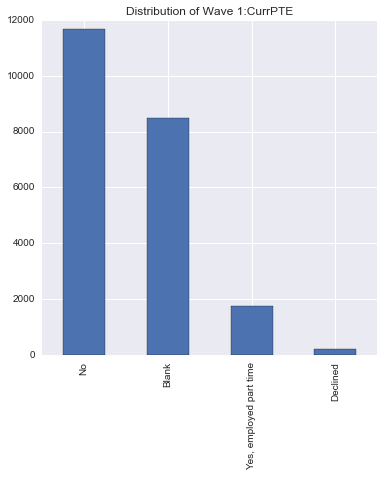

In [110]:
graph_outcmW1('CurrPTE')
outcomes_W1.groupby(['CurrPTE']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,EmplySklls,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
CurrPTE,,,,,,,,,,,,,,,,,,,,,
Blank,4582,4582,4582,4582,4582,4582,4582,4582,4582,4582,...,4582,4582,4582,4582,4582,4582,4582,4582,4582,4582
Declined,137,137,137,132,137,137,137,137,137,137,...,137,137,137,137,137,137,137,137,137,137
No,5371,5371,5371,5219,5371,5371,5371,5371,5371,5371,...,5371,5371,5371,5371,5371,5371,5371,5371,5371,5371
"Yes, employed part time",1816,1816,1816,1772,1816,1816,1816,1816,1816,1816,...,1816,1816,1816,1816,1816,1816,1816,1816,1816,1816


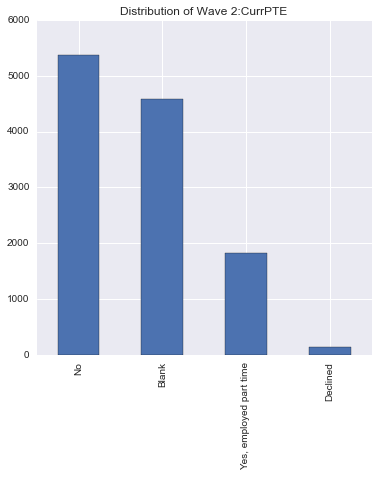

In [111]:
graph_outcmW2('CurrPTE')
outcomes_W2.groupby(['CurrPTE']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
EmplySklls,,,,,,,,,,,,,,,,,,,,,
Blank,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,...,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489
Declined,259,259,259,259,259,259,259,259,259,259,...,259,259,259,259,259,259,259,259,259,259
No,10290,10290,10290,10290,10290,10290,10290,10290,10290,10290,...,10290,10290,10290,10290,10290,10290,10290,10290,10290,10290
Yes,3073,3073,3073,3073,3073,3073,3073,3073,3073,3073,...,3073,3073,3073,3073,3073,3073,3073,3073,3073,3073


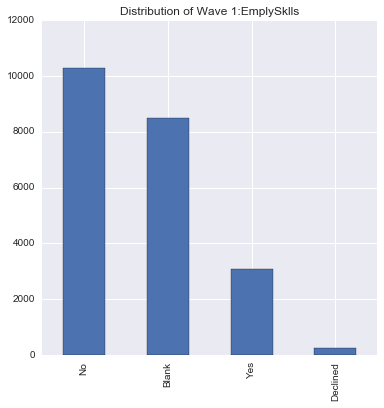

In [112]:
graph_outcmW1('EmplySklls')
outcomes_W1.groupby(['EmplySklls']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
EmplySklls,,,,,,,,,,,,,,,,,,,,,
Blank,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575,...,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575
Declined,149,149,149,142,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
No,4775,4775,4775,4636,4775,4775,4775,4775,4775,4775,...,4775,4775,4775,4775,4775,4775,4775,4775,4775,4775
Yes,2407,2407,2407,2352,2407,2407,2407,2407,2407,2407,...,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407


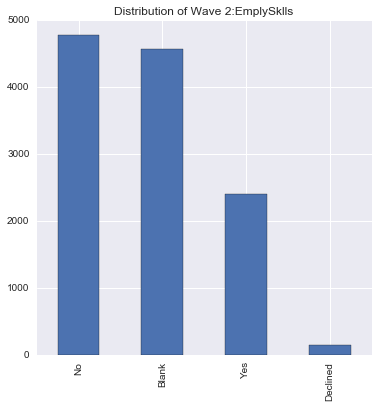

In [113]:
graph_outcmW2('EmplySklls')
outcomes_W2.groupby(['EmplySklls']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
EmplySklls,,,,,,,,,,,,,,,,,,,,,
Blank,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489,...,8489,8489,8489,8489,8489,8489,8489,8489,8489,8489
Declined,259,259,259,259,259,259,259,259,259,259,...,259,259,259,259,259,259,259,259,259,259
No,10290,10290,10290,10290,10290,10290,10290,10290,10290,10290,...,10290,10290,10290,10290,10290,10290,10290,10290,10290,10290
Yes,3073,3073,3073,3073,3073,3073,3073,3073,3073,3073,...,3073,3073,3073,3073,3073,3073,3073,3073,3073,3073


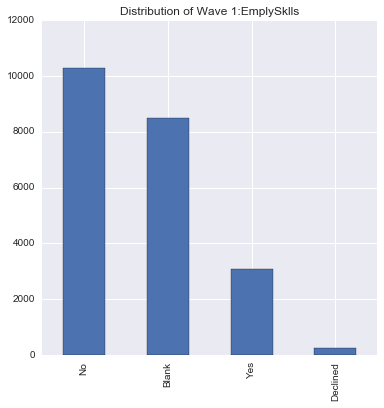

In [114]:
graph_outcmW1('EmplySklls')
outcomes_W1.groupby(['EmplySklls']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,SocSecrty,EducAid,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
EmplySklls,,,,,,,,,,,,,,,,,,,,,
Blank,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575,...,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575
Declined,149,149,149,142,149,149,149,149,149,149,...,149,149,149,149,149,149,149,149,149,149
No,4775,4775,4775,4636,4775,4775,4775,4775,4775,4775,...,4775,4775,4775,4775,4775,4775,4775,4775,4775,4775
Yes,2407,2407,2407,2352,2407,2407,2407,2407,2407,2407,...,2407,2407,2407,2407,2407,2407,2407,2407,2407,2407


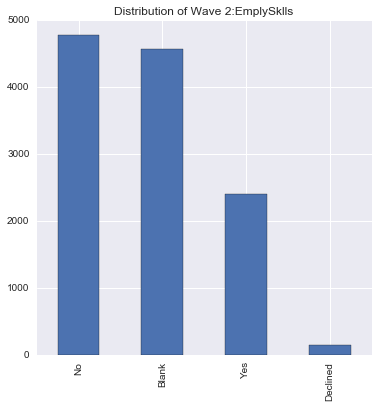

In [115]:
graph_outcmW2('EmplySklls')
outcomes_W2.groupby(['EmplySklls']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
EducAid,,,,,,,,,,,,,,,,,,,,,
Blank,8485,8485,8485,8485,8485,8485,8485,8485,8485,8485,...,8485,8485,8485,8485,8485,8485,8485,8485,8485,8485
Declined,342,342,342,342,342,342,342,342,342,342,...,342,342,342,342,342,342,342,342,342,342
No,12727,12727,12727,12727,12727,12727,12727,12727,12727,12727,...,12727,12727,12727,12727,12727,12727,12727,12727,12727,12727
Yes,557,557,557,557,557,557,557,557,557,557,...,557,557,557,557,557,557,557,557,557,557


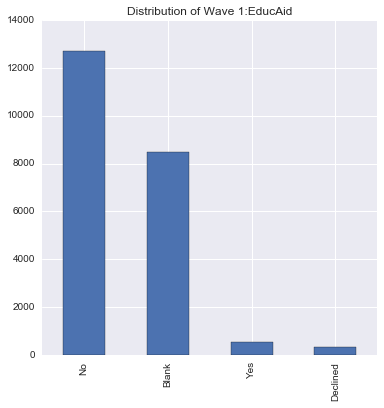

In [116]:
graph_outcmW1('EducAid')
outcomes_W1.groupby(['EducAid']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,PubFinAs,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
EducAid,,,,,,,,,,,,,,,,,,,,,
Blank,4579,4579,4579,4579,4579,4579,4579,4579,4579,4579,...,4579,4579,4579,4579,4579,4579,4579,4579,4579,4579
Declined,141,141,141,141,141,141,141,141,141,141,...,141,141,141,141,141,141,141,141,141,141
No,5409,5409,5409,5264,5409,5409,5409,5409,5409,5409,...,5409,5409,5409,5409,5409,5409,5409,5409,5409,5409
Yes,1777,1777,1777,1721,1777,1777,1777,1777,1777,1777,...,1777,1777,1777,1777,1777,1777,1777,1777,1777,1777


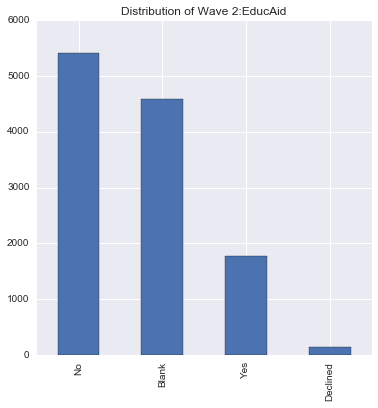

In [117]:
graph_outcmW2('EducAid')
outcomes_W2.groupby(['EducAid']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
PubFinAs,,,,,,,,,,,,,,,,,,,,,
Blank,9325,9325,9325,9325,9325,9325,9325,9325,9325,9325,...,9325,9325,9325,9325,9325,9325,9325,9325,9325,9325
Declined,228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,228,228,228,228
No,4735,4735,4735,4735,4735,4735,4735,4735,4735,4735,...,4735,4735,4735,4735,4735,4735,4735,4735,4735,4735
Not Applicable (in Foster Care),7363,7363,7363,7363,7363,7363,7363,7363,7363,7363,...,7363,7363,7363,7363,7363,7363,7363,7363,7363,7363
Yes,460,460,460,460,460,460,460,460,460,460,...,460,460,460,460,460,460,460,460,460,460


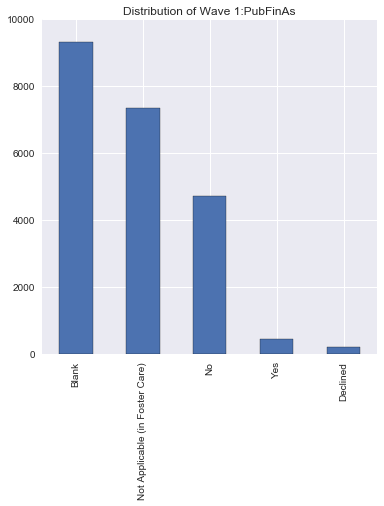

In [118]:
graph_outcmW1('PubFinAs')
outcomes_W1.groupby(['PubFinAs']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,CurrenRoll,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
PubFinAs,,,,,,,,,,,,,,,,,,,,,
Blank,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575,...,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575
Declined,124,124,124,122,124,124,124,124,124,124,...,124,124,124,124,124,124,124,124,124,124
No,4036,4036,4036,3853,4036,4036,4036,4036,4036,4036,...,4036,4036,4036,4036,4036,4036,4036,4036,4036,4036
Not Applicable (in Foster Care),2622,2622,2622,2618,2622,2622,2622,2622,2622,2622,...,2622,2622,2622,2622,2622,2622,2622,2622,2622,2622
Yes,549,549,549,537,549,549,549,549,549,549,...,549,549,549,549,549,549,549,549,549,549


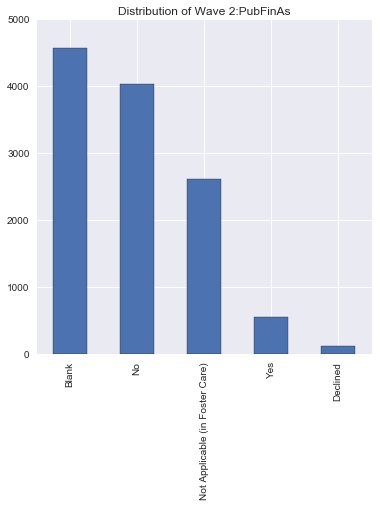

In [119]:
graph_outcmW2('PubFinAs')
outcomes_W2.groupby(['PubFinAs']).count()

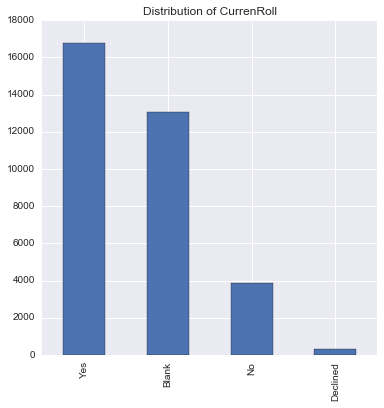

In [86]:
graph_outcmW1('CurrenRoll')
outcomes_W1.groupby(['CurrenRoll']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
CurrenRoll,,,,,,,,,,,,,,,,,,,,,
Blank,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575,...,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575
Declined,127,127,127,125,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
No,3230,3230,3230,3100,3230,3230,3230,3230,3230,3230,...,3230,3230,3230,3230,3230,3230,3230,3230,3230,3230
Yes,3974,3974,3974,3905,3974,3974,3974,3974,3974,3974,...,3974,3974,3974,3974,3974,3974,3974,3974,3974,3974


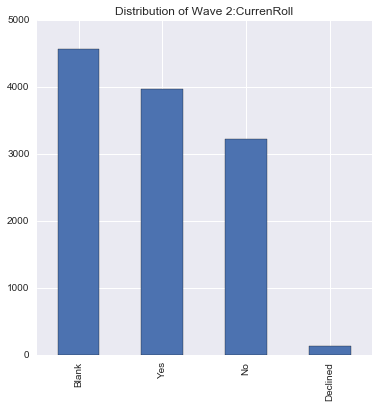

In [120]:
graph_outcmW2('CurrenRoll')
outcomes_W2.groupby(['CurrenRoll']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
CnctAdult,,,,,,,,,,,,,,,,,,,,,
Blank,8485,8485,8485,8485,8485,8485,8485,8485,8485,8485,...,8485,8485,8485,8485,8485,8485,8485,8485,8485,8485
Declined,201,201,201,201,201,201,201,201,201,201,...,201,201,201,201,201,201,201,201,201,201
No,699,699,699,699,699,699,699,699,699,699,...,699,699,699,699,699,699,699,699,699,699
Yes,12726,12726,12726,12726,12726,12726,12726,12726,12726,12726,...,12726,12726,12726,12726,12726,12726,12726,12726,12726,12726


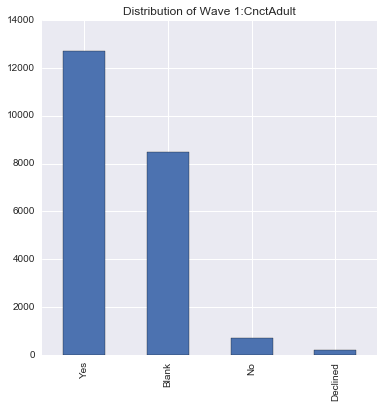

In [121]:
graph_outcmW1('CnctAdult')
outcomes_W1.groupby(['CnctAdult']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
CnctAdult,,,,,,,,,,,,,,,,,,,,,
Blank,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576,...,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576
Declined,123,123,123,117,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
No,547,547,547,535,547,547,547,547,547,547,...,547,547,547,547,547,547,547,547,547,547
Yes,6660,6660,6660,6477,6660,6660,6660,6660,6660,6660,...,6660,6660,6660,6660,6660,6660,6660,6660,6660,6660


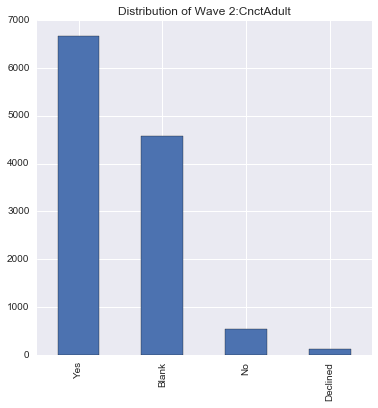

In [122]:
graph_outcmW2('CnctAdult')
outcomes_W2.groupby(['CnctAdult']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
PrescripIn,,,,,,,,,,,,,,,,,,,,,
Blank,8485,8485,8485,8485,8485,8485,8485,8485,8485,8485,...,8485,8485,8485,8485,8485,8485,8485,8485,8485,8485
Declined,23,23,23,23,23,23,23,23,23,23,...,23,23,23,23,23,23,23,23,23,23
Don't Know,206,206,206,206,206,206,206,206,206,206,...,206,206,206,206,206,206,206,206,206,206
No,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
Not Applicable,11394,11394,11394,11394,11394,11394,11394,11394,11394,11394,...,11394,11394,11394,11394,11394,11394,11394,11394,11394,11394
Yes,1962,1962,1962,1962,1962,1962,1962,1962,1962,1962,...,1962,1962,1962,1962,1962,1962,1962,1962,1962,1962


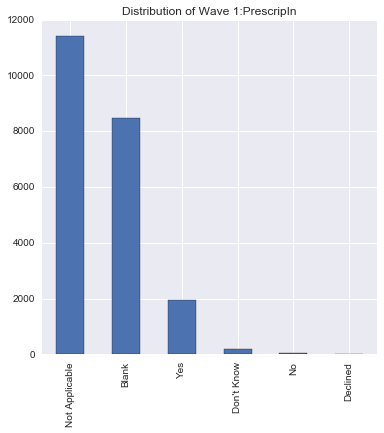

In [123]:
graph_outcmW1('PrescripIn')
outcomes_W1.groupby(['PrescripIn']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
PrescripIn,,,,,,,,,,,,,,,,,,,,,
Blank,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575,...,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575
Declined,43,43,43,41,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
Don't Know,70,70,70,68,70,70,70,70,70,70,...,70,70,70,70,70,70,70,70,70,70
No,52,52,52,49,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
Not Applicable,6401,6401,6401,6231,6401,6401,6401,6401,6401,6401,...,6401,6401,6401,6401,6401,6401,6401,6401,6401,6401
Yes,765,765,765,741,765,765,765,765,765,765,...,765,765,765,765,765,765,765,765,765,765


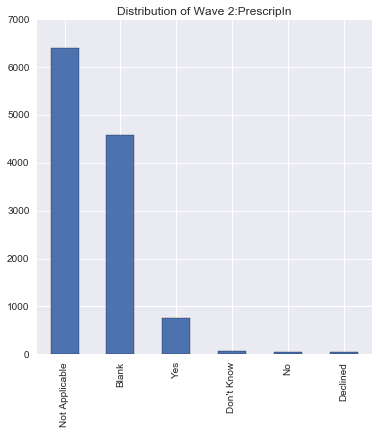

In [124]:
graph_outcmW2('PrescripIn')
outcomes_W2.groupby(['PrescripIn']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Homeless,,,,,,,,,,,,,,,,,,,,,
Blank,8487,8487,8487,8487,8487,8487,8487,8487,8487,8487,...,8487,8487,8487,8487,8487,8487,8487,8487,8487,8487
Declined,282,282,282,282,282,282,282,282,282,282,...,282,282,282,282,282,282,282,282,282,282
No,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983,...,10983,10983,10983,10983,10983,10983,10983,10983,10983,10983
Yes,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359,...,2359,2359,2359,2359,2359,2359,2359,2359,2359,2359


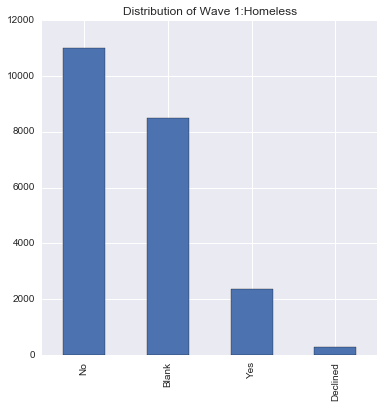

In [125]:
graph_outcmW1('Homeless')
outcomes_W1.groupby(['Homeless']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Homeless,,,,,,,,,,,,,,,,,,,,,
Blank,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,...,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578
Declined,156,156,156,148,156,156,156,156,156,156,...,156,156,156,156,156,156,156,156,156,156
No,5755,5755,5755,5599,5755,5755,5755,5755,5755,5755,...,5755,5755,5755,5755,5755,5755,5755,5755,5755,5755
Yes,1417,1417,1417,1380,1417,1417,1417,1417,1417,1417,...,1417,1417,1417,1417,1417,1417,1417,1417,1417,1417


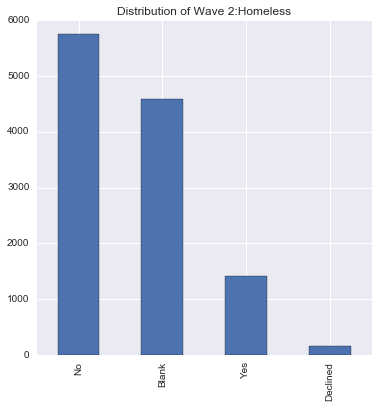

In [126]:
graph_outcmW2('Homeless')
outcomes_W2.groupby(['Homeless']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
SubAbuse,,,,,,,,,,,,,,,,,,,,,
Blank,8474,8474,8474,8474,8474,8474,8474,8474,8474,8474,...,8474,8474,8474,8474,8474,8474,8474,8474,8474,8474
Declined,256,256,256,256,256,256,256,256,256,256,...,256,256,256,256,256,256,256,256,256,256
No,9873,9873,9873,9873,9873,9873,9873,9873,9873,9873,...,9873,9873,9873,9873,9873,9873,9873,9873,9873,9873
Yes,3508,3508,3508,3508,3508,3508,3508,3508,3508,3508,...,3508,3508,3508,3508,3508,3508,3508,3508,3508,3508


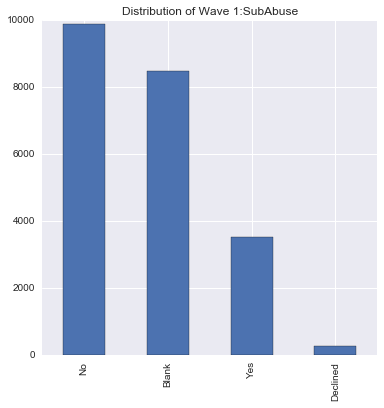

In [127]:
graph_outcmW1('SubAbuse')
outcomes_W1.groupby(['SubAbuse']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
SubAbuse,,,,,,,,,,,,,,,,,,,,,
Blank,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577,...,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577
Declined,125,125,125,122,125,125,125,125,125,125,...,125,125,125,125,125,125,125,125,125,125
No,6221,6221,6221,6061,6221,6221,6221,6221,6221,6221,...,6221,6221,6221,6221,6221,6221,6221,6221,6221,6221
Yes,983,983,983,945,983,983,983,983,983,983,...,983,983,983,983,983,983,983,983,983,983


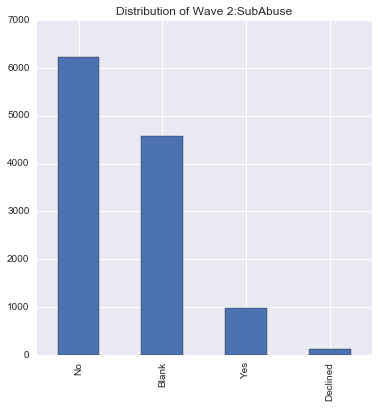

In [128]:
graph_outcmW2('SubAbuse')
outcomes_W2.groupby(['SubAbuse']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Incarc,,,,,,,,,,,,,,,,,,,,,
Blank,8472,8472,8472,8472,8472,8472,8472,8472,8472,8472,...,8472,8472,8472,8472,8472,8472,8472,8472,8472,8472
Declined,289,289,289,289,289,289,289,289,289,289,...,289,289,289,289,289,289,289,289,289,289
No,8864,8864,8864,8864,8864,8864,8864,8864,8864,8864,...,8864,8864,8864,8864,8864,8864,8864,8864,8864,8864
Yes,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486,...,4486,4486,4486,4486,4486,4486,4486,4486,4486,4486


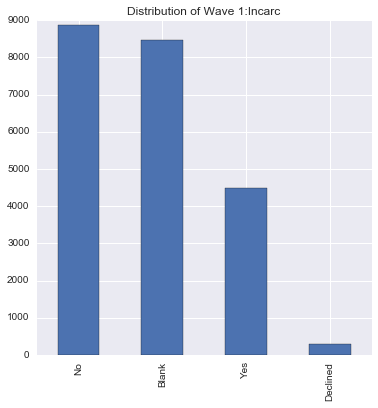

In [129]:
graph_outcmW1('Incarc')
outcomes_W1.groupby(['Incarc']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Incarc,,,,,,,,,,,,,,,,,,,,,
Blank,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578,...,4578,4578,4578,4578,4578,4578,4578,4578,4578,4578
Declined,142,142,142,141,142,142,142,142,142,142,...,142,142,142,142,142,142,142,142,142,142
No,5744,5744,5744,5612,5744,5744,5744,5744,5744,5744,...,5744,5744,5744,5744,5744,5744,5744,5744,5744,5744
Yes,1442,1442,1442,1374,1442,1442,1442,1442,1442,1442,...,1442,1442,1442,1442,1442,1442,1442,1442,1442,1442


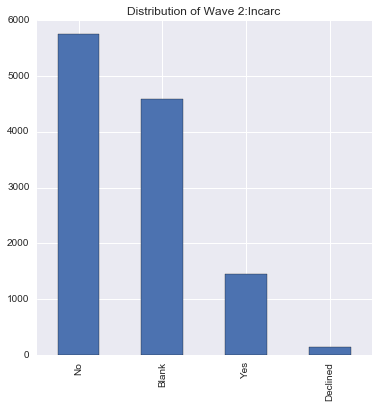

In [130]:
graph_outcmW2('Incarc')
outcomes_W2.groupby(['Incarc']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Children,,,,,,,,,,,,,,,,,,,,,
Blank,8692,8692,8692,8692,8692,8692,8692,8692,8692,8692,...,8692,8692,8692,8692,8692,8692,8692,8692,8692,8692
Declined,228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,228,228,228,228
No,12353,12353,12353,12353,12353,12353,12353,12353,12353,12353,...,12353,12353,12353,12353,12353,12353,12353,12353,12353,12353
Yes,838,838,838,838,838,838,838,838,838,838,...,838,838,838,838,838,838,838,838,838,838


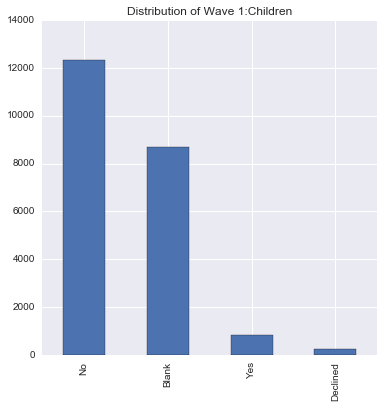

In [131]:
graph_outcmW1('Children')
outcomes_W1.groupby(['Children']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Marriage,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Children,,,,,,,,,,,,,,,,,,,,,
Blank,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575,...,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575
Declined,196,196,196,188,196,196,196,196,196,196,...,196,196,196,196,196,196,196,196,196,196
No,6273,6273,6273,6100,6273,6273,6273,6273,6273,6273,...,6273,6273,6273,6273,6273,6273,6273,6273,6273,6273
Yes,862,862,862,842,862,862,862,862,862,862,...,862,862,862,862,862,862,862,862,862,862


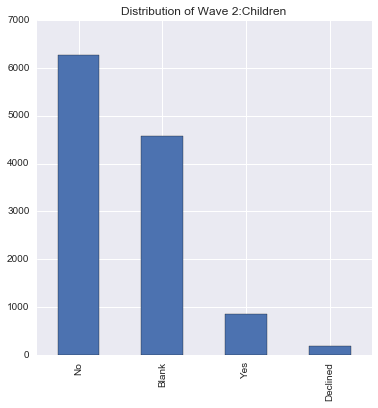

In [132]:
graph_outcmW2('Children')
outcomes_W2.groupby(['Children']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Marriage,,,,,,,,,,,,,,,,,,,,,
Blank,8505,8505,8505,8505,8505,8505,8505,8505,8505,8505,...,8505,8505,8505,8505,8505,8505,8505,8505,8505,8505
Declined,163,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
No,848,848,848,848,848,848,848,848,848,848,...,848,848,848,848,848,848,848,848,848,848
Not Applicable,12576,12576,12576,12576,12576,12576,12576,12576,12576,12576,...,12576,12576,12576,12576,12576,12576,12576,12576,12576,12576
Yes,19,19,19,19,19,19,19,19,19,19,...,19,19,19,19,19,19,19,19,19,19


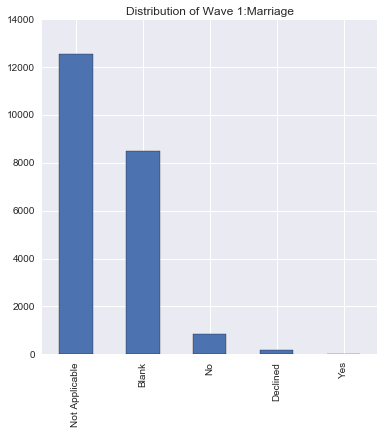

In [133]:
graph_outcmW1('Marriage')
outcomes_W1.groupby(['Marriage']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Medicaid,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Marriage,,,,,,,,,,,,,,,,,,,,,
Blank,4571,4571,4571,4571,4571,4571,4571,4571,4571,4571,...,4571,4571,4571,4571,4571,4571,4571,4571,4571,4571
Declined,37,37,37,33,37,37,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
No,820,820,820,802,820,820,820,820,820,820,...,820,820,820,820,820,820,820,820,820,820
Not Applicable,6431,6431,6431,6252,6431,6431,6431,6431,6431,6431,...,6431,6431,6431,6431,6431,6431,6431,6431,6431,6431
Yes,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47


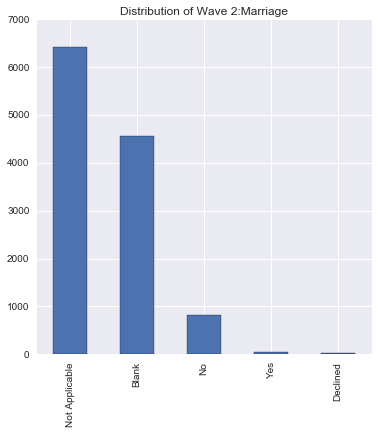

In [134]:
graph_outcmW2('Marriage')
outcomes_W2.groupby(['Marriage']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Marriage,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Medicaid,,,,,,,,,,,,,,,,,,,,,
Blank,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757,...,8757,8757,8757,8757,8757,8757,8757,8757,8757,8757
Declined,248,248,248,248,248,248,248,248,248,248,...,248,248,248,248,248,248,248,248,248,248
Do Not Know,721,721,721,721,721,721,721,721,721,721,...,721,721,721,721,721,721,721,721,721,721
No,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098,...,1098,1098,1098,1098,1098,1098,1098,1098,1098,1098
Yes,11287,11287,11287,11287,11287,11287,11287,11287,11287,11287,...,11287,11287,11287,11287,11287,11287,11287,11287,11287,11287


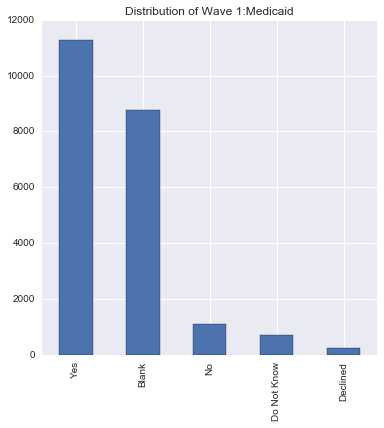

In [135]:
graph_outcmW1('Medicaid')
outcomes_W1.groupby(['Medicaid']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Marriage,OthrHlthIn,MedicalIn,MentlHlthIn,Wave
Medicaid,,,,,,,,,,,,,,,,,,,,,
Blank,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577,...,4577,4577,4577,4577,4577,4577,4577,4577,4577,4577
Declined,127,127,127,125,127,127,127,127,127,127,...,127,127,127,127,127,127,127,127,127,127
Do Not Know,384,384,384,371,384,384,384,384,384,384,...,384,384,384,384,384,384,384,384,384,384
No,1326,1326,1326,1267,1326,1326,1326,1326,1326,1326,...,1326,1326,1326,1326,1326,1326,1326,1326,1326,1326
Yes,5492,5492,5492,5365,5492,5492,5492,5492,5492,5492,...,5492,5492,5492,5492,5492,5492,5492,5492,5492,5492


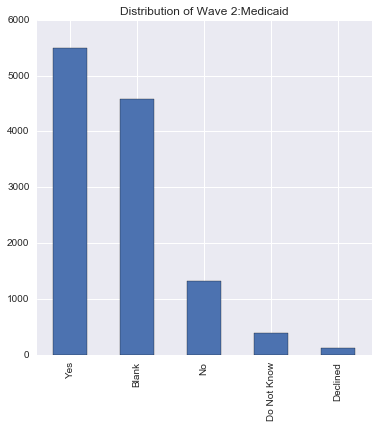

In [136]:
graph_outcmW2('Medicaid')
outcomes_W2.groupby(['Medicaid']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,MedicalIn,MentlHlthIn,Wave
OthrHlthIn,,,,,,,,,,,,,,,,,,,,,
88.0,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
Blank,8768,8768,8768,8768,8768,8768,8768,8768,8768,8768,...,8768,8768,8768,8768,8768,8768,8768,8768,8768,8768
Declined,216,216,216,216,216,216,216,216,216,216,...,216,216,216,216,216,216,216,216,216,216
Do Not Know,1708,1708,1708,1708,1708,1708,1708,1708,1708,1708,...,1708,1708,1708,1708,1708,1708,1708,1708,1708,1708
No,9109,9109,9109,9109,9109,9109,9109,9109,9109,9109,...,9109,9109,9109,9109,9109,9109,9109,9109,9109,9109
Yes,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302,...,2302,2302,2302,2302,2302,2302,2302,2302,2302,2302


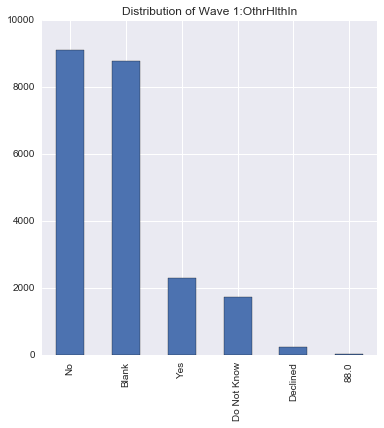

In [137]:
graph_outcmW1('OthrHlthIn')
outcomes_W1.groupby(['OthrHlthIn']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,MedicalIn,MentlHlthIn,Wave
OthrHlthIn,,,,,,,,,,,,,,,,,,,,,
78.0,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Blank,4579,4579,4579,4579,4579,4579,4579,4579,4579,4579,...,4579,4579,4579,4579,4579,4579,4579,4579,4579,4579
Declined,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
Do Not Know,521,521,521,513,521,521,521,521,521,521,...,521,521,521,521,521,521,521,521,521,521
No,5648,5648,5648,5486,5648,5648,5648,5648,5648,5648,...,5648,5648,5648,5648,5648,5648,5648,5648,5648,5648
Yes,1001,1001,1001,970,1001,1001,1001,1001,1001,1001,...,1001,1001,1001,1001,1001,1001,1001,1001,1001,1001


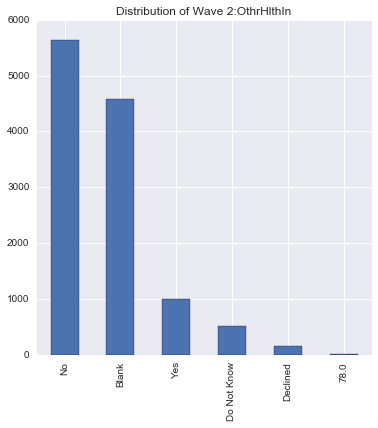

In [138]:
graph_outcmW2('OthrHlthIn')
outcomes_W2.groupby(['OthrHlthIn']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MentlHlthIn,Wave
MedicalIn,,,,,,,,,,,,,,,,,,,,,
Blank,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,...,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481
Declined,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
Don't Know,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253
No,43,43,43,43,43,43,43,43,43,43,...,43,43,43,43,43,43,43,43,43,43
Not Applicable,11210,11210,11210,11210,11210,11210,11210,11210,11210,11210,...,11210,11210,11210,11210,11210,11210,11210,11210,11210,11210
Yes,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094


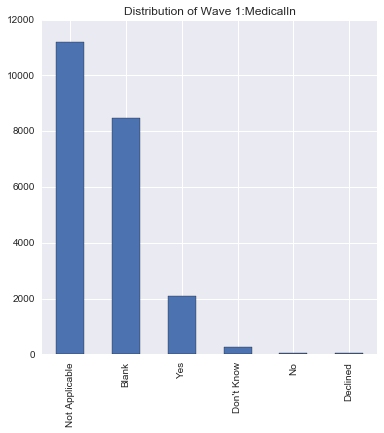

In [139]:
graph_outcmW1('MedicalIn')
outcomes_W1.groupby(['MedicalIn']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MentlHlthIn,Wave
MedicalIn,,,,,,,,,,,,,,,,,,,,,
Blank,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575,...,4575,4575,4575,4575,4575,4575,4575,4575,4575,4575
Declined,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
Don't Know,84,84,84,82,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
No,58,58,58,54,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
Not Applicable,6296,6296,6296,6126,6296,6296,6296,6296,6296,6296,...,6296,6296,6296,6296,6296,6296,6296,6296,6296,6296
Yes,871,871,871,846,871,871,871,871,871,871,...,871,871,871,871,871,871,871,871,871,871


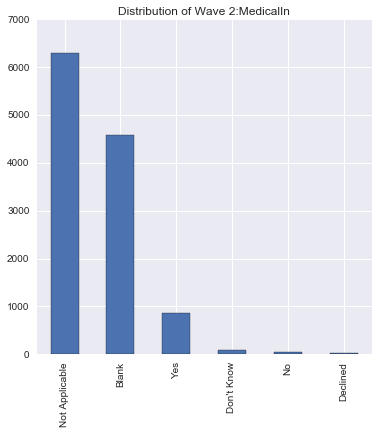

In [140]:
graph_outcmW2('MedicalIn')
outcomes_W2.groupby(['MedicalIn']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,Wave
MentlHlthIn,,,,,,,,,,,,,,,,,,,,,
Blank,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481,...,8481,8481,8481,8481,8481,8481,8481,8481,8481,8481
Declined,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Don't Know,347,347,347,347,347,347,347,347,347,347,...,347,347,347,347,347,347,347,347,347,347
No,73,73,73,73,73,73,73,73,73,73,...,73,73,73,73,73,73,73,73,73,73
Not Applicable,11395,11395,11395,11395,11395,11395,11395,11395,11395,11395,...,11395,11395,11395,11395,11395,11395,11395,11395,11395,11395
Yes,1791,1791,1791,1791,1791,1791,1791,1791,1791,1791,...,1791,1791,1791,1791,1791,1791,1791,1791,1791,1791


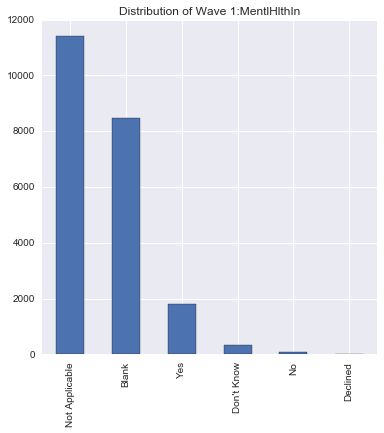

In [141]:
graph_outcmW1('MentlHlthIn')
outcomes_W1.groupby(['MentlHlthIn']).count()

,PubFoodAs,PubHousAs,OthrFinAs,HighEdCert,CurrFTE,CurrPTE,EmplySklls,SocSecrty,EducAid,PubFinAs,...,PrescripIn,Homeless,SubAbuse,Incarc,Children,Marriage,Medicaid,OthrHlthIn,MedicalIn,Wave
MentlHlthIn,,,,,,,,,,,,,,,,,,,,,
Blank,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576,...,4576,4576,4576,4576,4576,4576,4576,4576,4576,4576
Declined,45,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
Don't Know,140,140,140,130,140,140,140,140,140,140,...,140,140,140,140,140,140,140,140,140,140
No,77,77,77,74,77,77,77,77,77,77,...,77,77,77,77,77,77,77,77,77,77
Not Applicable,6401,6401,6401,6231,6401,6401,6401,6401,6401,6401,...,6401,6401,6401,6401,6401,6401,6401,6401,6401,6401
Yes,667,667,667,649,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667


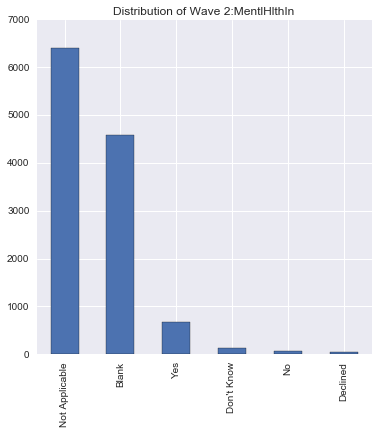

In [142]:
graph_outcmW2('MentlHlthIn')
outcomes_W2.groupby(['MentlHlthIn']).count()

____________________________________________________________________________________________________________

# Distributions of Info

In [143]:
info = cohort_1[['Wave','RepDate_outcomes','SampleState','InSample','Baseline','FY11Cohort','Elig19','OutcmRpt',\
                 'OutcmDte','OutcmFCS','Responded','FY','RepDate_services','FCStatSv']]

info_W1 = info[info.Wave == "Wave 1: Age 17 Baseline Survey"]
info_W2 = info[info.Wave == "Wave 2: Age 19 Followup"]

info_W1.describe(include='all')

,Wave,RepDate_outcomes,SampleState,InSample,Baseline,FY11Cohort,Elig19,OutcmRpt,OutcmDte,OutcmFCS,Responded,FY,RepDate_services,FCStatSv
count,22111,22111,22111,3542,22111,22111,22111,22111,17976,22111,22111,22111.0,22111,22111.000000
unique,1,3,2,2,1,2,2,9,503,2,2,NaN,2,NaN
top,Wave 1: Age 17 Baseline Survey,2011-03-01 00:00:00,No,No,Yes,Yes,No,Youth participated,2011-04-28 00:00:00,"Yes, is in FC on Date",Responded to Survey,NaN,2011-09-01 00:00:00,NaN
freq,22111,11517,18569,2020,22111,12018,11512,13666,125,21107,12018,NaN,11999,NaN
first,NaN,2011-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1900-12-31 00:00:00,NaN,NaN,NaN,2011-03-01 00:00:00,NaN
last,NaN,2012-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2028-10-11 00:00:00,NaN,NaN,NaN,2011-09-01 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,0.956402
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.204204
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,1.000000


In [144]:
info_W2.describe(include='all')

,Wave,RepDate_outcomes,SampleState,InSample,Baseline,FY11Cohort,Elig19,OutcmRpt,OutcmDte,OutcmFCS,Responded,FY,RepDate_services,FCStatSv
count,11906,11906,11906,11906,11906,11906,11906,11906,11906,11906,11906,11906.0,11906,11906.000000
unique,1,3,2,2,1,1,2,9,421,2,2,NaN,2,NaN
top,Wave 2: Age 19 Followup,2013-09-01 00:00:00,No,No,Yes,Yes,Yes,Youth participated,1900-01-01 00:00:00,"No, is not in FC on Date",Responded to Survey,NaN,2011-09-01 00:00:00,NaN
freq,11906,5689,8963,10384,11906,11906,10485,7311,2235,8679,7287,NaN,6438,NaN
first,NaN,1999-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,1900-01-01 00:00:00,NaN,NaN,NaN,2011-03-01 00:00:00,NaN
last,NaN,2013-09-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,2014-03-28 00:00:00,NaN,NaN,NaN,2011-09-01 00:00:00,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,0.960860
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.193936
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.0,NaN,1.000000


In [145]:
def graph_infoW1(column, figsize_i=(6,6)):
    dist = info_W1[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 1:" + str(column), figsize=figsize_i)
    
def graph_infoW2(column, figsize_i=(6,6)):
    dist = info_W2[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of Wave 2:" + str(column), figsize=figsize_i)

def graph_info(column):
    dist = info[column].value_counts()
    dist.plot(kind = 'bar',title="Distribution of " + str(column), figsize=(6,6))


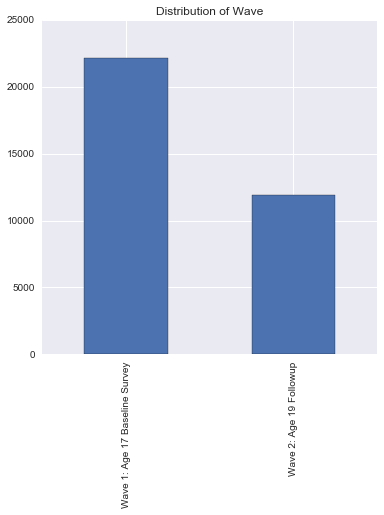

In [146]:
graph_info('Wave')

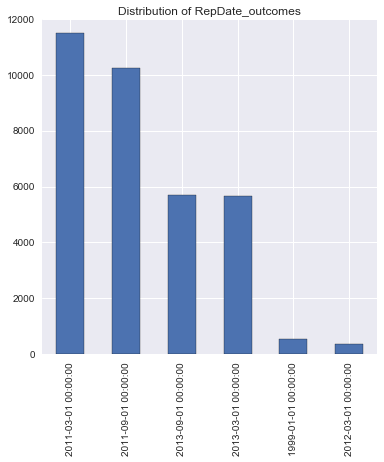

In [100]:
graph_info('RepDate_outcomes')


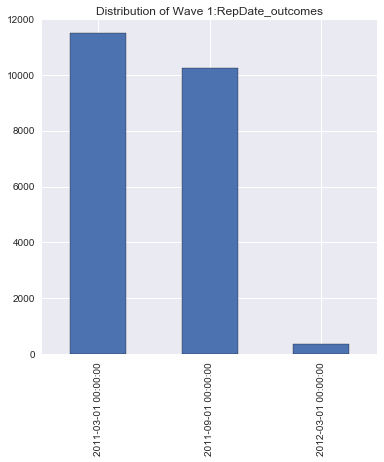

In [149]:
graph_infoW1('RepDate_outcomes')


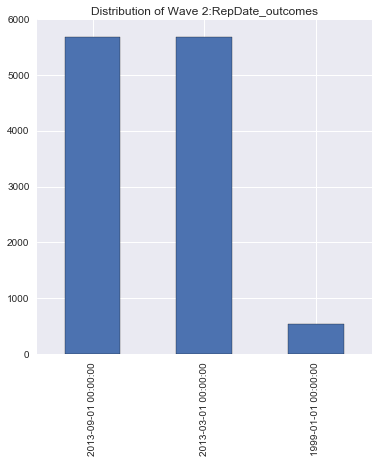

In [150]:
graph_infoW2('RepDate_outcomes')


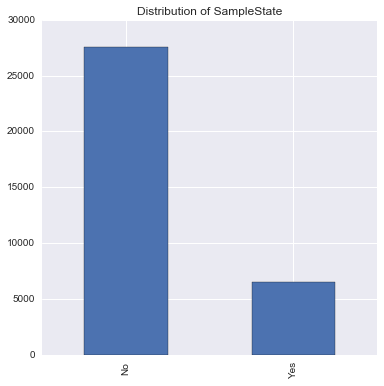

In [101]:
graph_info('SampleState')


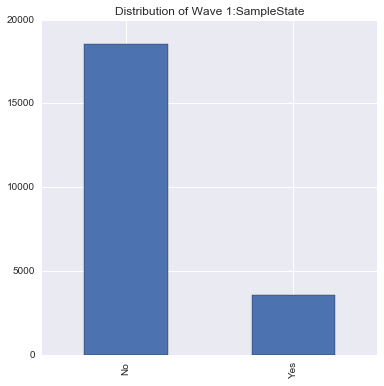

In [151]:
graph_infoW1('SampleState')


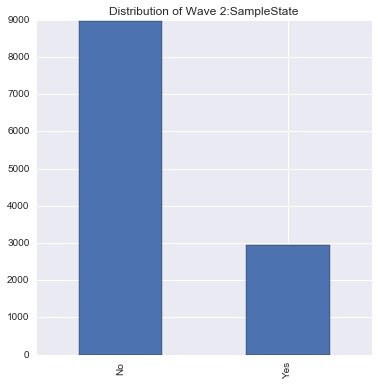

In [152]:
graph_infoW2('SampleState')


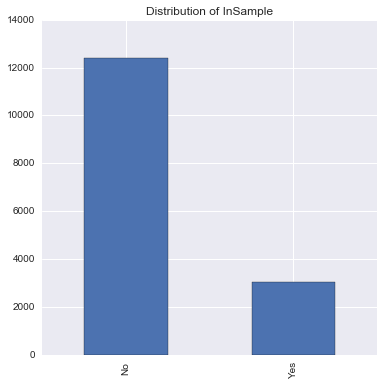

In [102]:
graph_info('InSample')


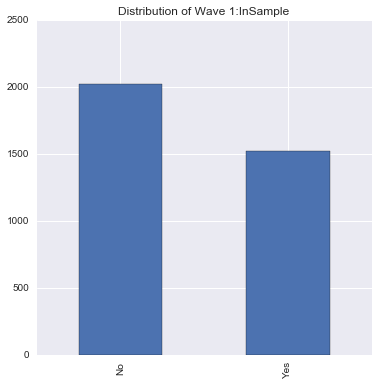

In [153]:
graph_infoW1('InSample')


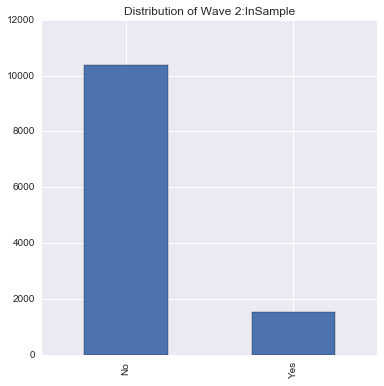

In [154]:
graph_infoW2('InSample')


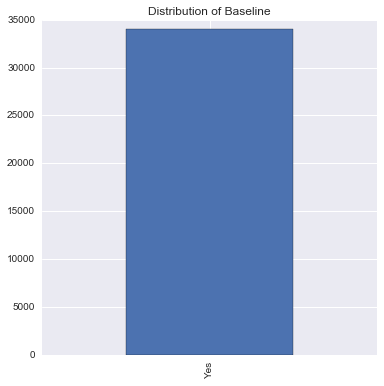

In [103]:
graph_info('Baseline')


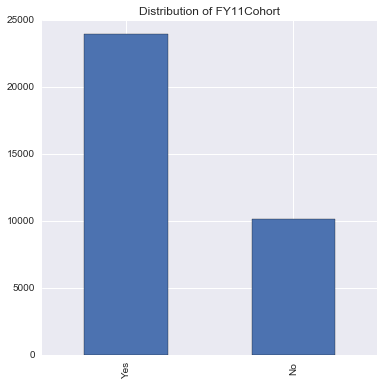

In [104]:
graph_info('FY11Cohort')


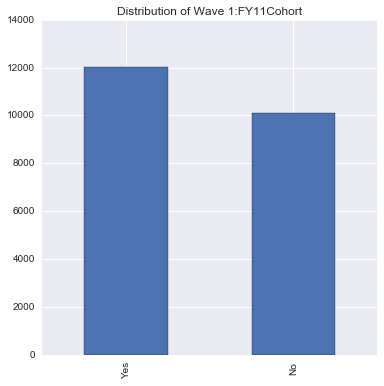

In [157]:
graph_infoW1('FY11Cohort')


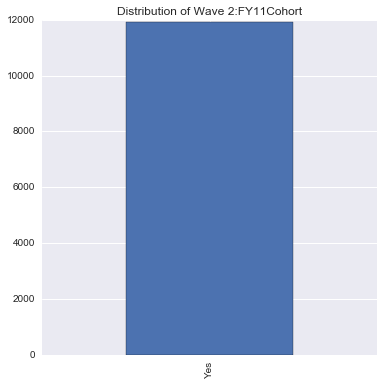

In [158]:
graph_infoW2('FY11Cohort')


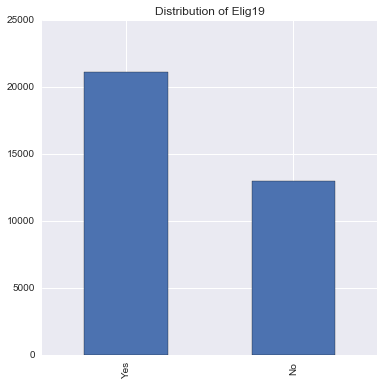

In [105]:
graph_info('Elig19')


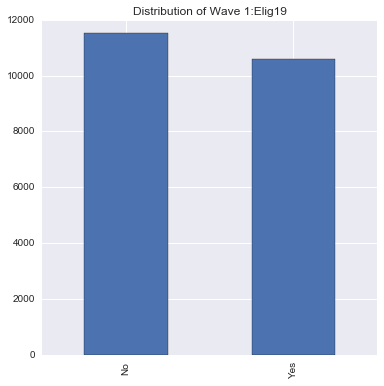

In [159]:
graph_infoW1('Elig19')


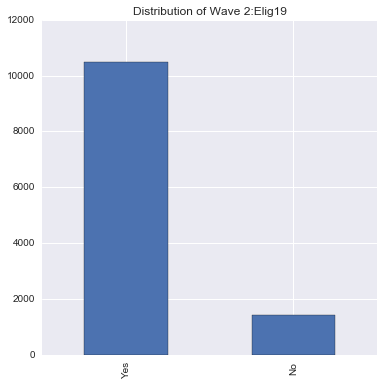

In [160]:
graph_infoW2('Elig19')


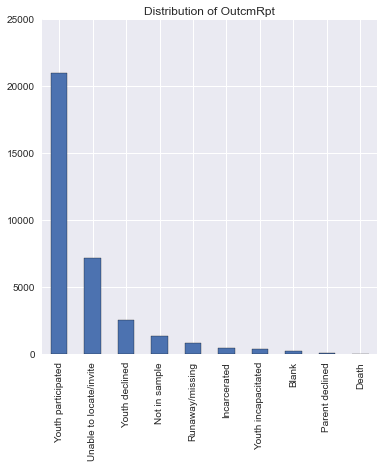

In [106]:
graph_info('OutcmRpt')


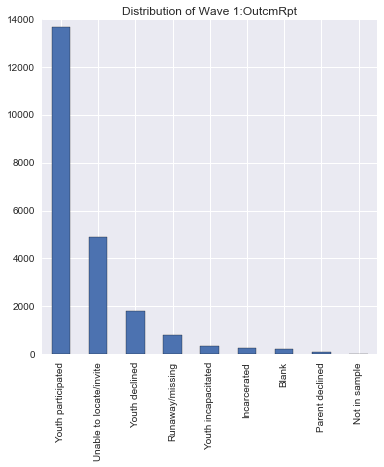

In [161]:
graph_infoW1('OutcmRpt')


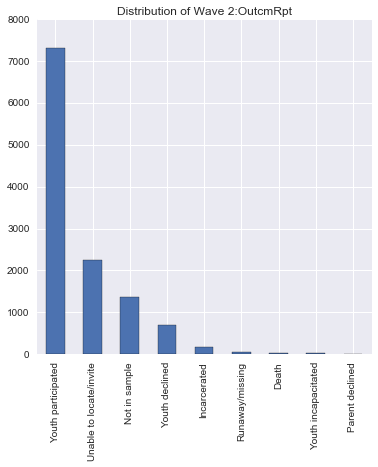

In [162]:
graph_infoW2('OutcmRpt')


In [123]:
# # outcome_date_no_nans = info['OutcmDte'].dropna()
# outcome_date_no_nans
# # outcome_date_no_nans.plot(kind='line')

# import datetime as dt

# x = [outcome_date_no_nans]
# y = range(len(x)) # many thanks to Kyss Tao for setting me straight here

# import matplotlib.dates as mdates

# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
# plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# plt.plot(x,y)
# plt.gcf().autofmt_xdate()

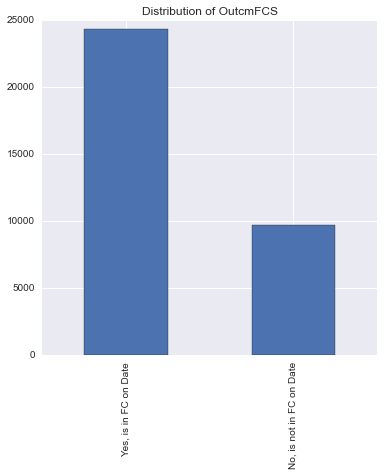

In [118]:
graph_info('OutcmFCS')


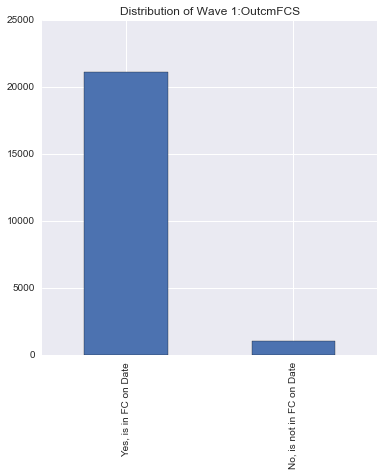

In [163]:
graph_infoW1('OutcmFCS')


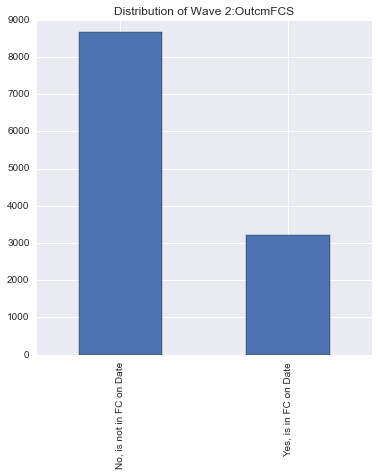

In [164]:
graph_infoW2('OutcmFCS')


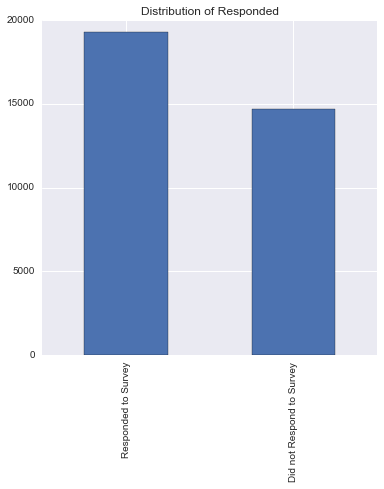

In [119]:
graph_info('Responded')


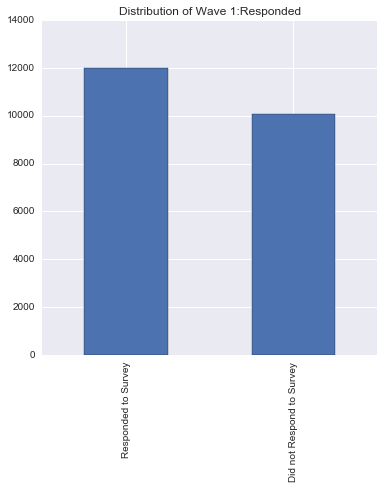

In [165]:
graph_infoW1('Responded')


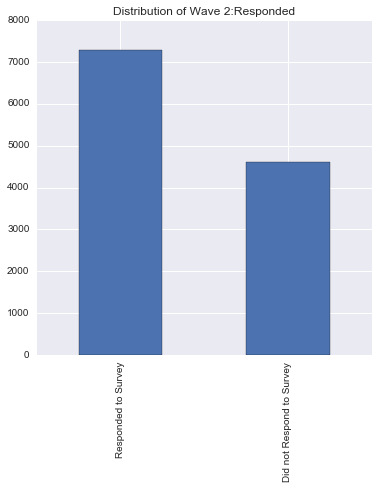

In [166]:
graph_infoW2('Responded')


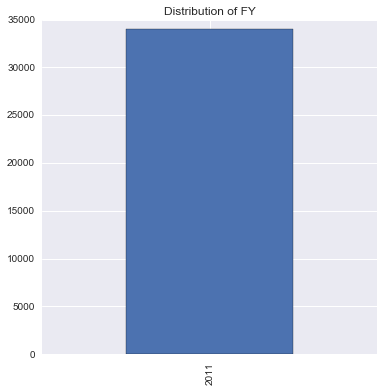

In [120]:
graph_info('FY')


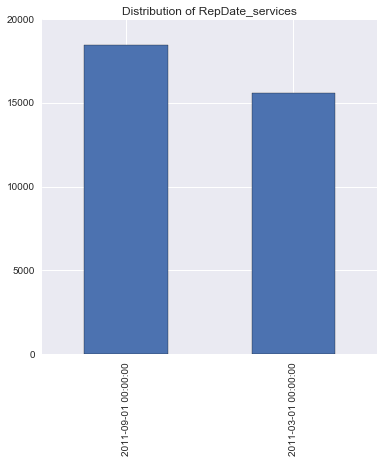

In [121]:
graph_info('RepDate_services')


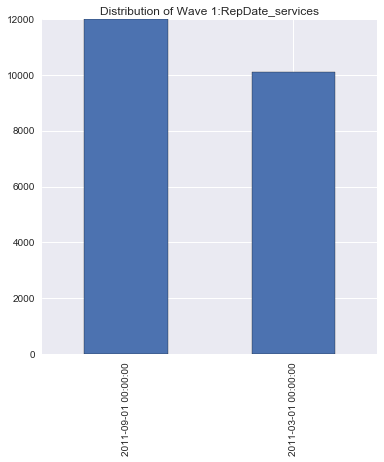

In [169]:
graph_infoW1('RepDate_services')


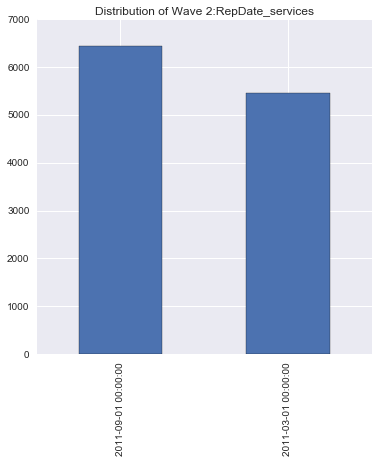

In [170]:
graph_infoW2('RepDate_services')


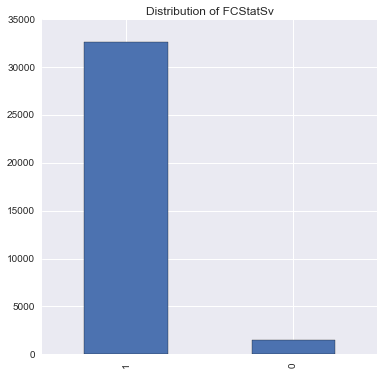

In [122]:
graph_info('FCStatSv')

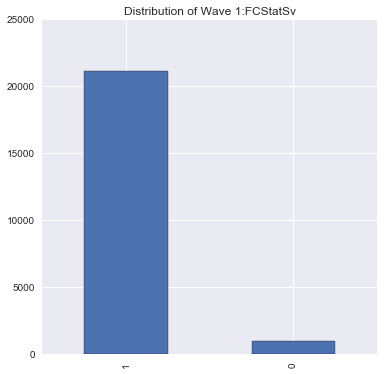

In [171]:
graph_infoW1('FCStatSv')

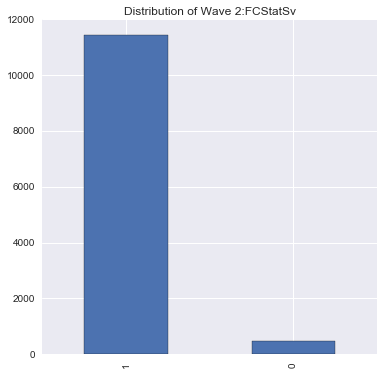

In [172]:
graph_infoW2('FCStatSv')

_____________________________________________________________________________________________________________________

# BiVariate Analysis

In [152]:
mentor_adcn = pd.pivot_table(cohort_1, values='StFCID',index=['CnctAdult'],columns=['MentorSv'],aggfunc='count')
mentor_adcn


MentorSv,0,1,77
CnctAdult,,,
Blank,8087.0,1760.0,3214.0
Declined,278.0,46.0,NaN
No,988.0,203.0,55.0
Yes,14956.0,3671.0,759.0


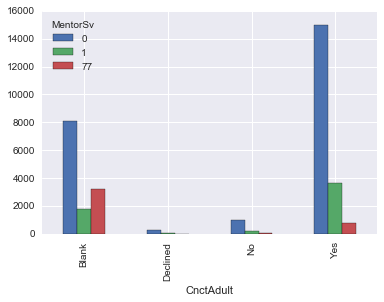

In [153]:
mentor_adcn.plot(kind='bar')

In [155]:
edFin_edCert = pd.pivot_table(cohort_1, values='StFCID',index=['HighEdCert'],columns=['EducFinaSv'],aggfunc='count')
edFin_edCert

EducFinaSv,0,1,77
HighEdCert,,,
Associate's Degree,9.0,1.0,NaN
Bachelor's Degree,6.0,NaN,NaN
Blank,8949.0,978.0,3215.0
Declined,657.0,73.0,4.0
High school diploma/GED,3961.0,595.0,143.0
Higher degree,13.0,4.0,NaN
None of the above,12911.0,1471.0,659.0
Vocational certificate,119.0,11.0,2.0
Vocational license,23.0,7.0,5.0


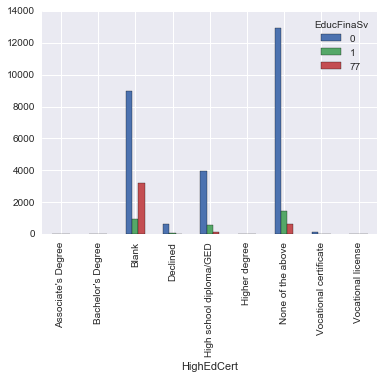

In [156]:
edFin_edCert.plot(kind='bar')

In [157]:
CareerSv_CurrFTE = pd.pivot_table(cohort_1, values='StFCID',index=['CurrFTE'],columns=['CareerSv'],aggfunc='count')
CareerSv_CurrFTE

CareerSv,0,1,77
CurrFTE,,,
Blank,6264,3567,3214
Declined,143,83,6
No,11583,7305,752
"Yes, employed full time",614,430,56


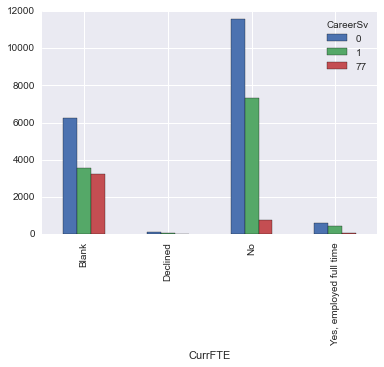

In [158]:
CareerSv_CurrFTE.plot(kind='bar')

In [159]:
ILNAsv_home = pd.pivot_table(cohort_1, values='StFCID',index=['Homeless'],columns=['ILNAsv'],aggfunc='count')
ILNAsv_home

ILNAsv,0,1,77
Homeless,,,
Blank,4616.0,5235.0,3214.0
Declined,212.0,226.0,NaN
No,7548.0,8442.0,748.0
Yes,1715.0,1995.0,66.0


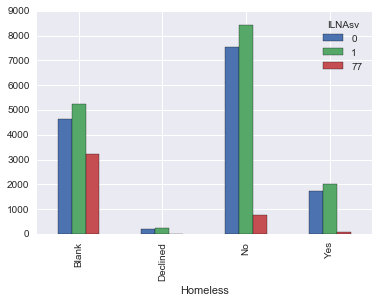

In [160]:
ILNAsv_home.plot(kind='bar')

In [163]:
ILNAsv_incarc = pd.pivot_table(cohort_1, values='StFCID',index=['Incarc'],columns=['ILNAsv'],aggfunc='count')
ILNAsv_incarc

ILNAsv,0,1,77
Incarc,,,
Blank,4606,5230,3214
Declined,202,217,12
No,6746,7275,587
Yes,2537,3176,215


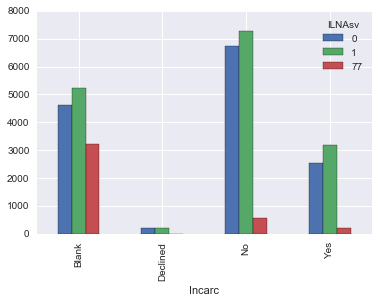

In [164]:
ILNAsv_incarc.plot(kind='bar')

In [165]:
ILNAsv_subAbu = pd.pivot_table(cohort_1, values='StFCID',index=['SubAbuse'],columns=['ILNAsv'],aggfunc='count')
ILNAsv_subAbu

ILNAsv,0,1,77
SubAbuse,,,
Blank,4606,5231,3214
Declined,174,203,4
No,7383,8089,622
Yes,1928,2375,188


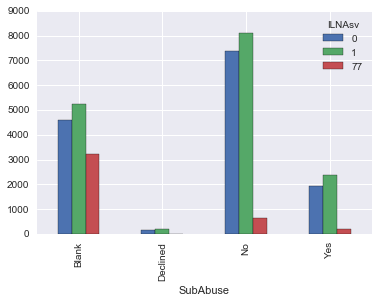

In [166]:
ILNAsv_subAbu.plot(kind='bar')

In [167]:
ILNAsv_CurrPTE = pd.pivot_table(cohort_1, values='StFCID',index=['CurrPTE'],columns=['ILNAsv'],aggfunc='count')
ILNAsv_CurrPTE

ILNAsv,0,1,77
CurrPTE,,,
Blank,4600,5247,3214
Declined,164,163,4
No,7706,8694,652
"Yes, employed part time",1621,1794,158


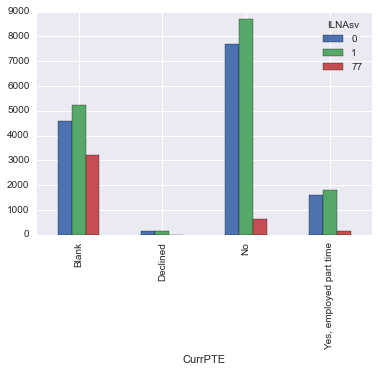

In [168]:
ILNAsv_CurrPTE.plot(kind='bar')